### Modifed fetcher (3000 samples)

Include the analysis script and setup the folders with raw data

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments")
s3_folder_filter="1711-justfetch/s3/*benchmark_e2e*"
scratch_folder_filter="1711-justfetch/scratch/*benchmark_e2e*"

#### Load raw

In [3]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 288.58it/s]


In [4]:
# Show data (to check if loaded correctly)

# df_dataloader_s3.sort_values(["start_time_x"], ascending=False)
# df_dataloader_scratch.sort_values(["start_time_x"], ascending=False)

In [5]:
# extract unique functions (for s3 and scratch, it's the same)
unique_functions_s3 = np.unique(df_dataloader_s3["item_x"])

# define colors for timelane items 
colors = {}
for i, color in zip(unique_functions_s3, ["red", "gold", "blue", "magenta", "aqua"]):
    colors[str(i)] = color
    
# define lanes (each lane is for a single function call (i.e. usage))
lanes={}
for i, lane in zip(unique_functions_s3, range(len(unique_functions_s3))):
    lanes[str(i)] = lane

# print to verify
print(f"Unique functions: {unique_functions_s3}")
print(f"Lanes: {lanes}")
    
# get the names of the runs for the iterators later on 
unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']
Lanes: {'batch': 0, 'next_data': 1, 'run_training_batch': 2, 'training_batch_to_device': 3}


#### Timeline plots 

Each line corresponds to a unique function call.

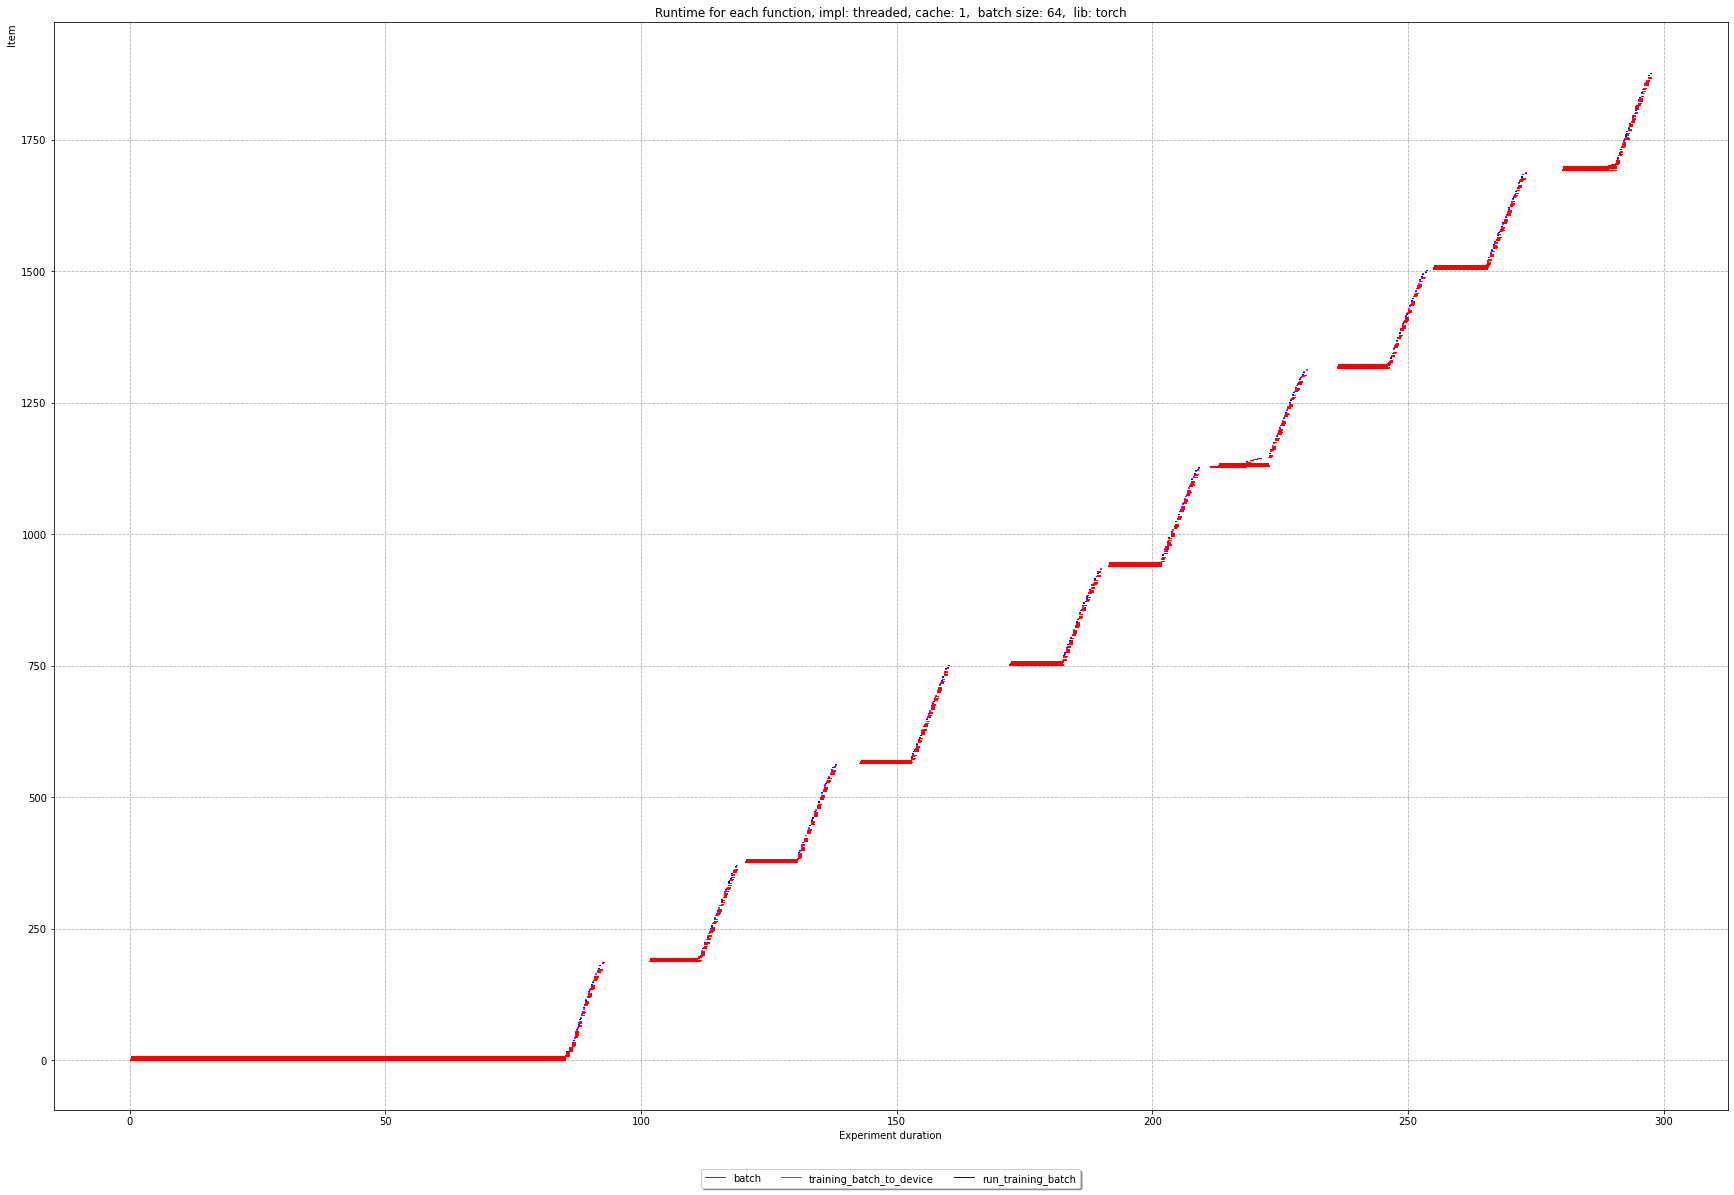

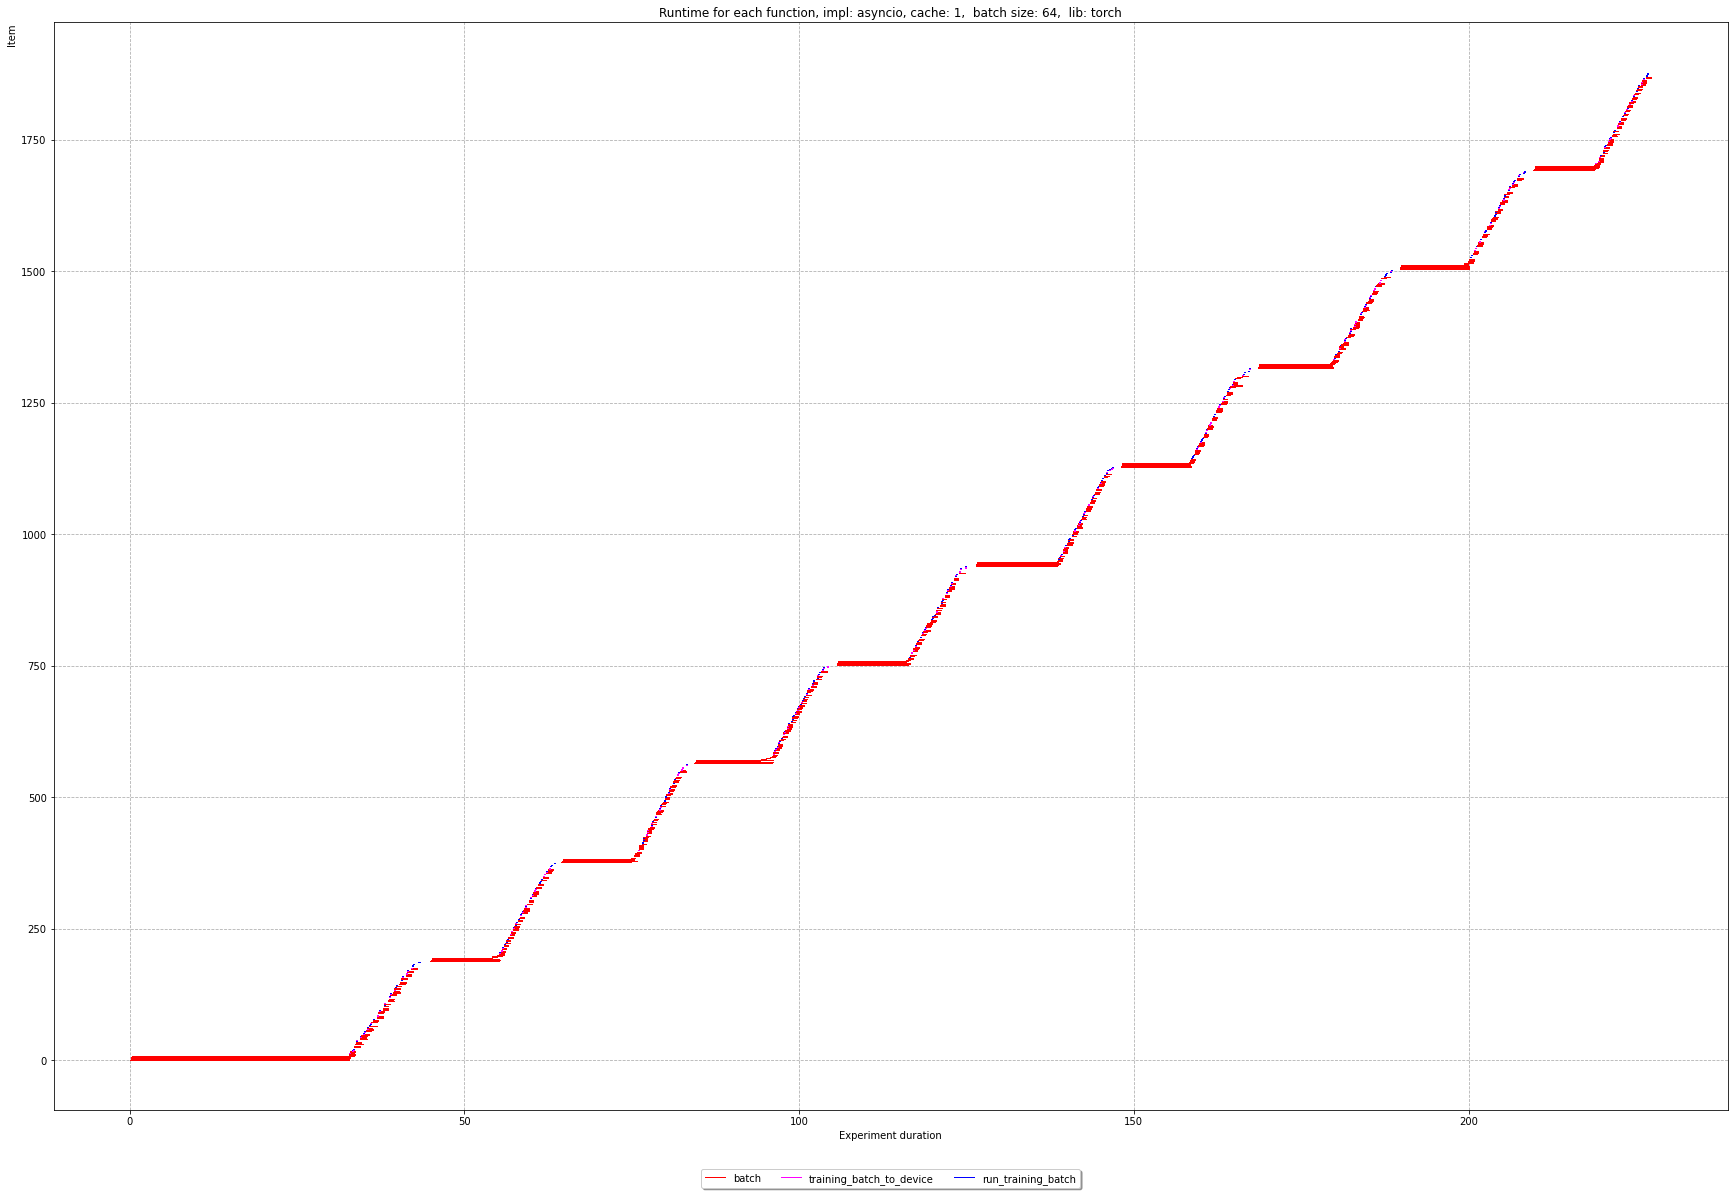

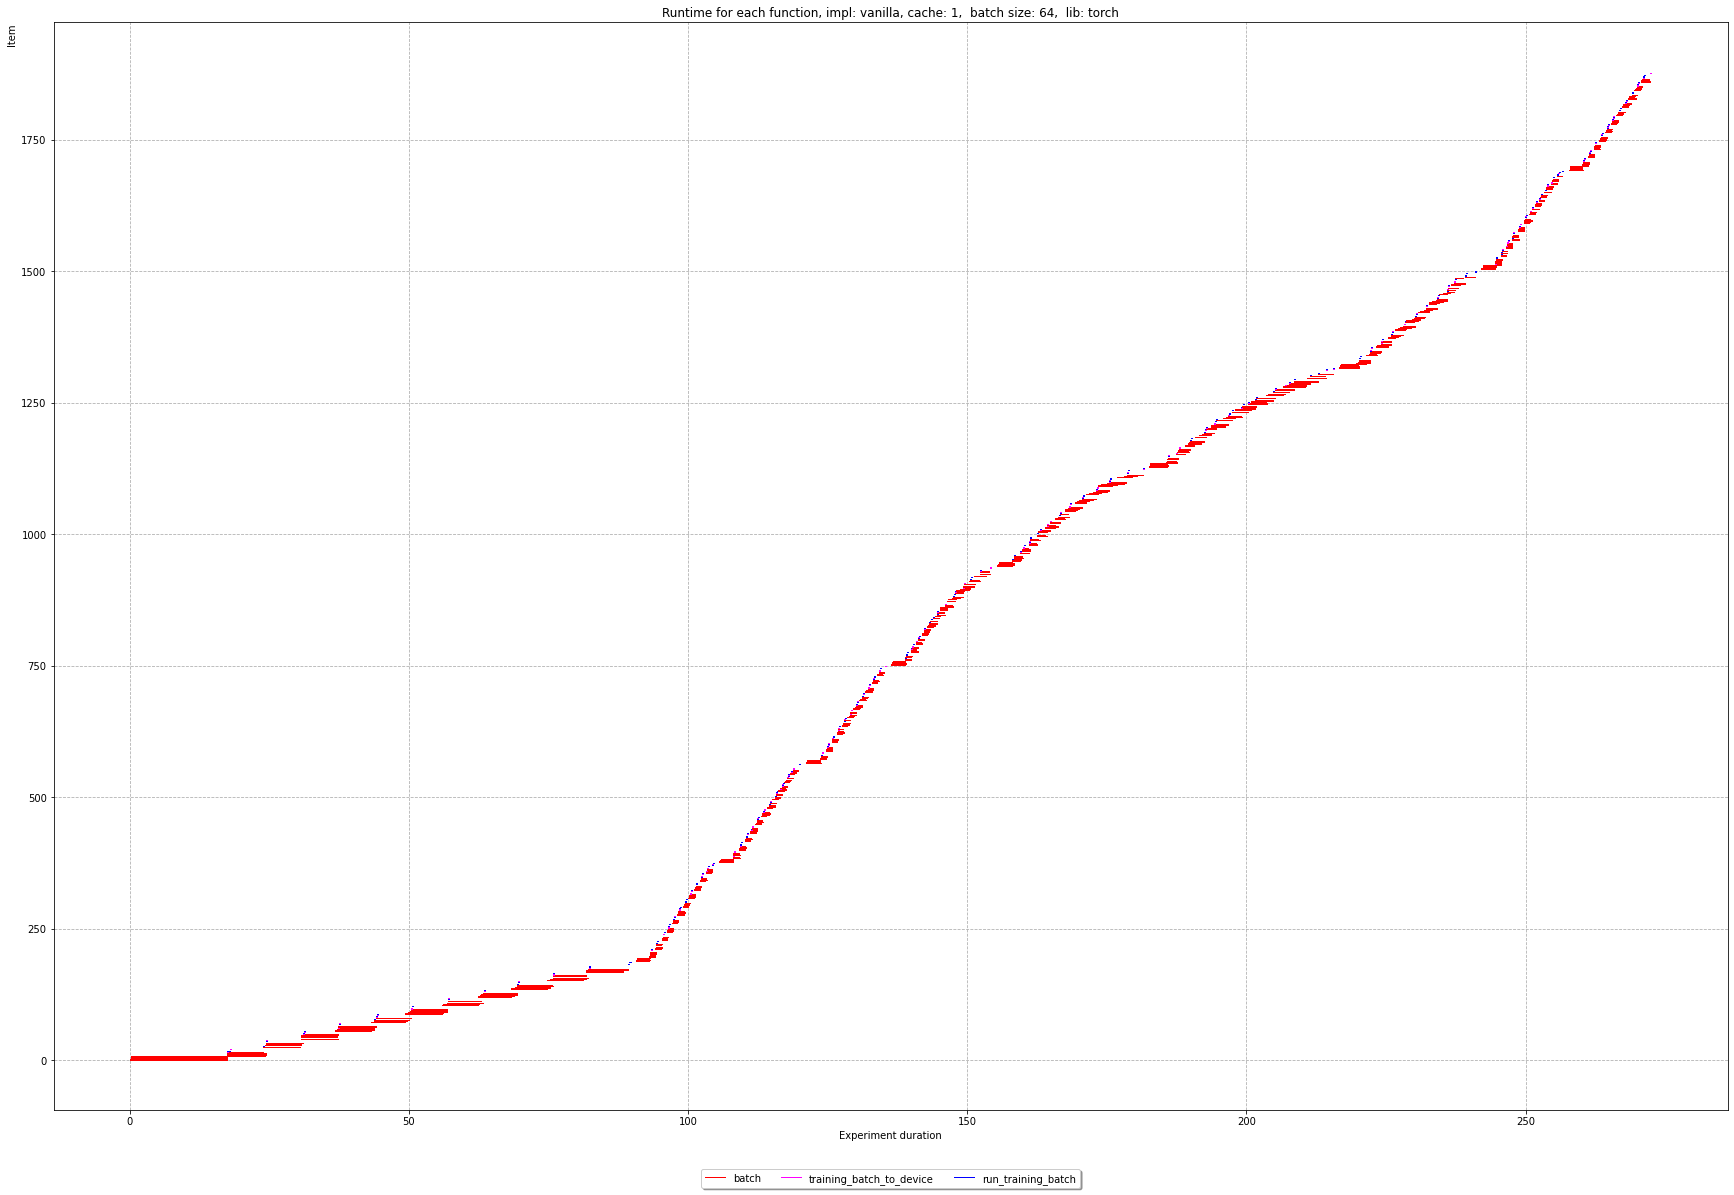

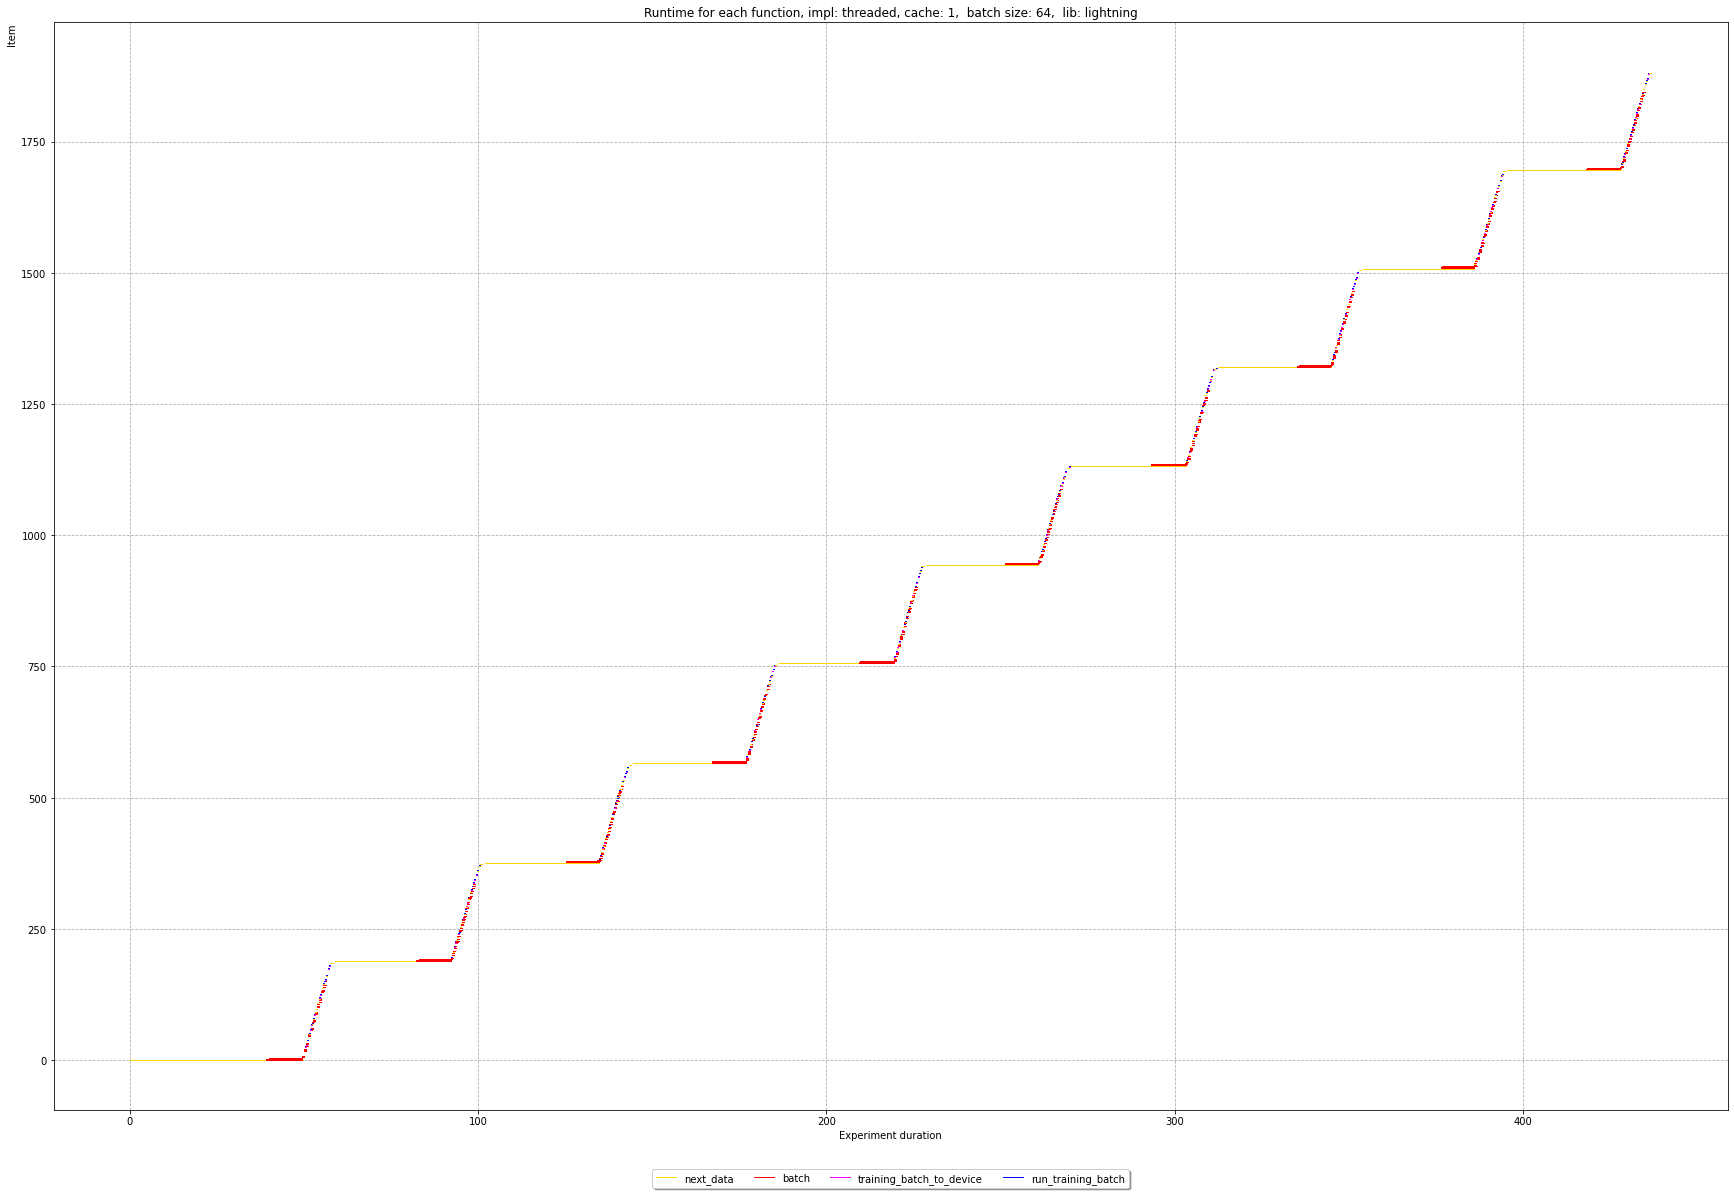

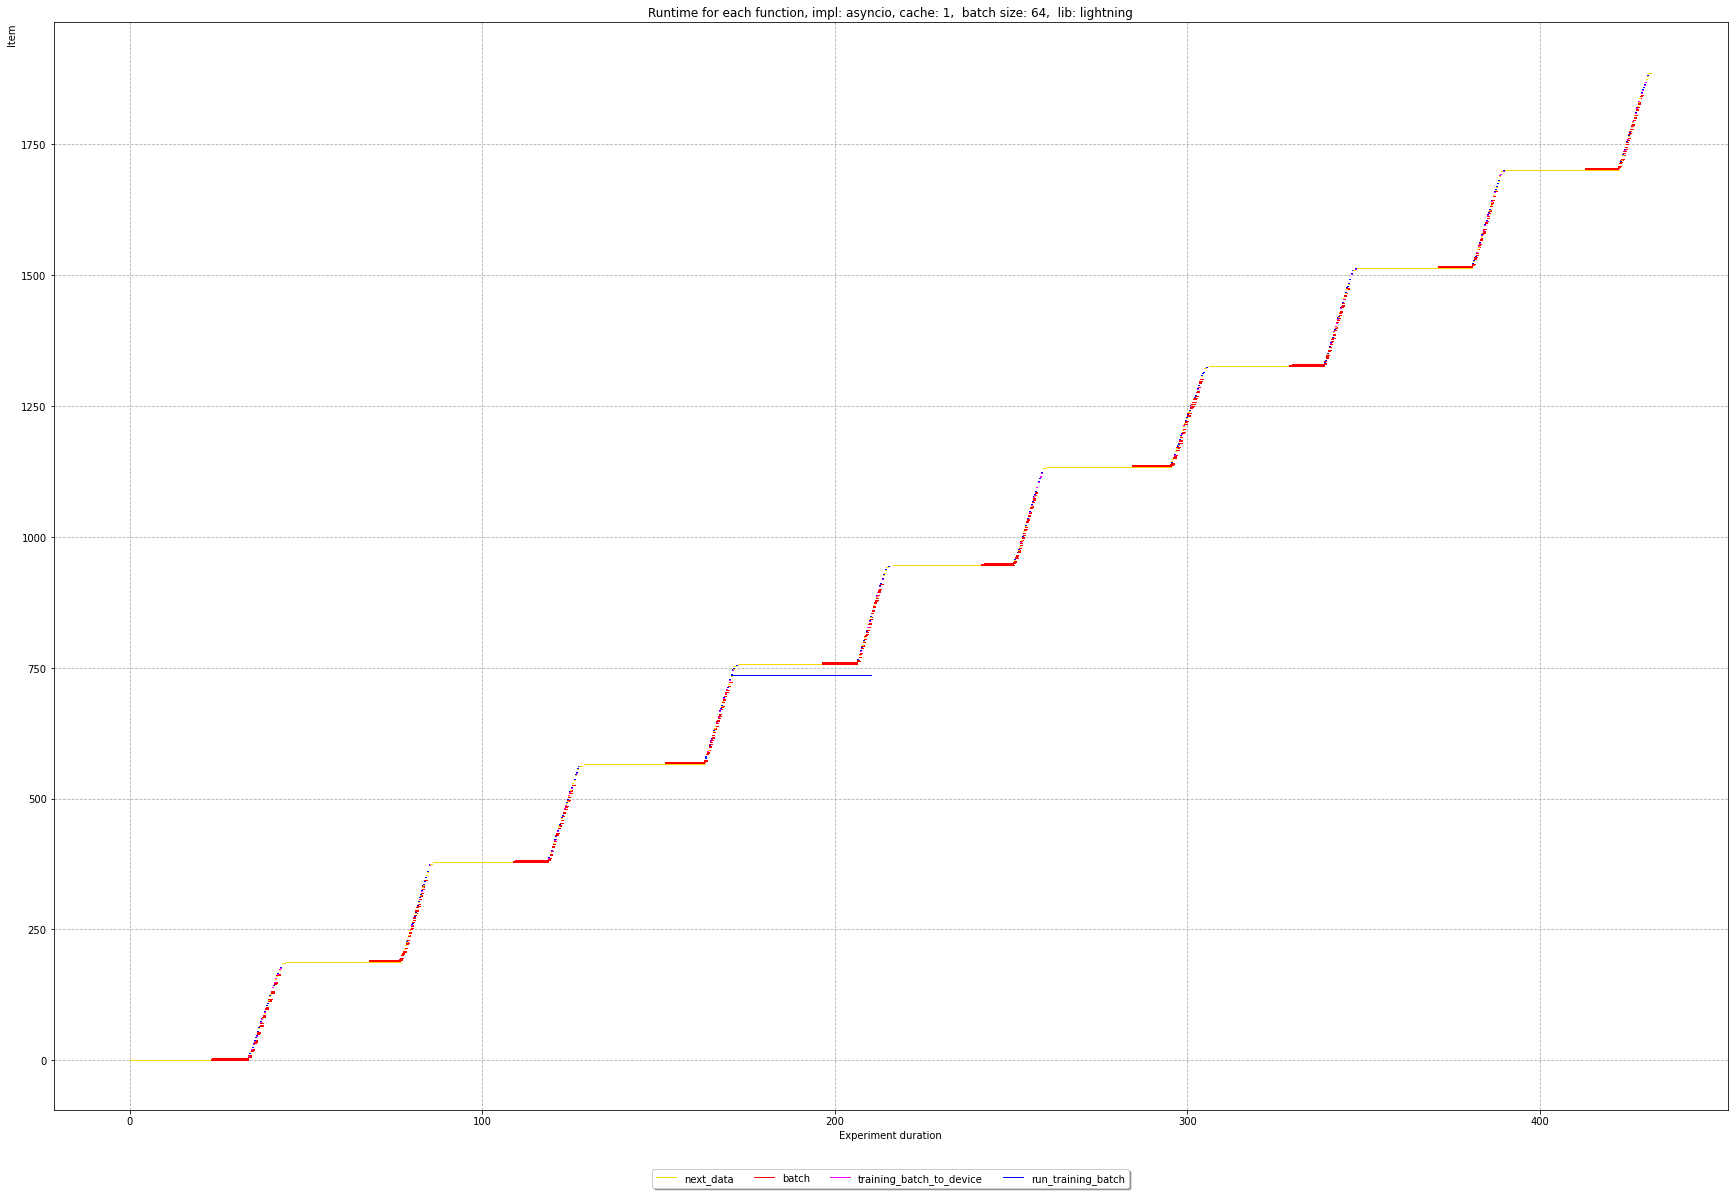

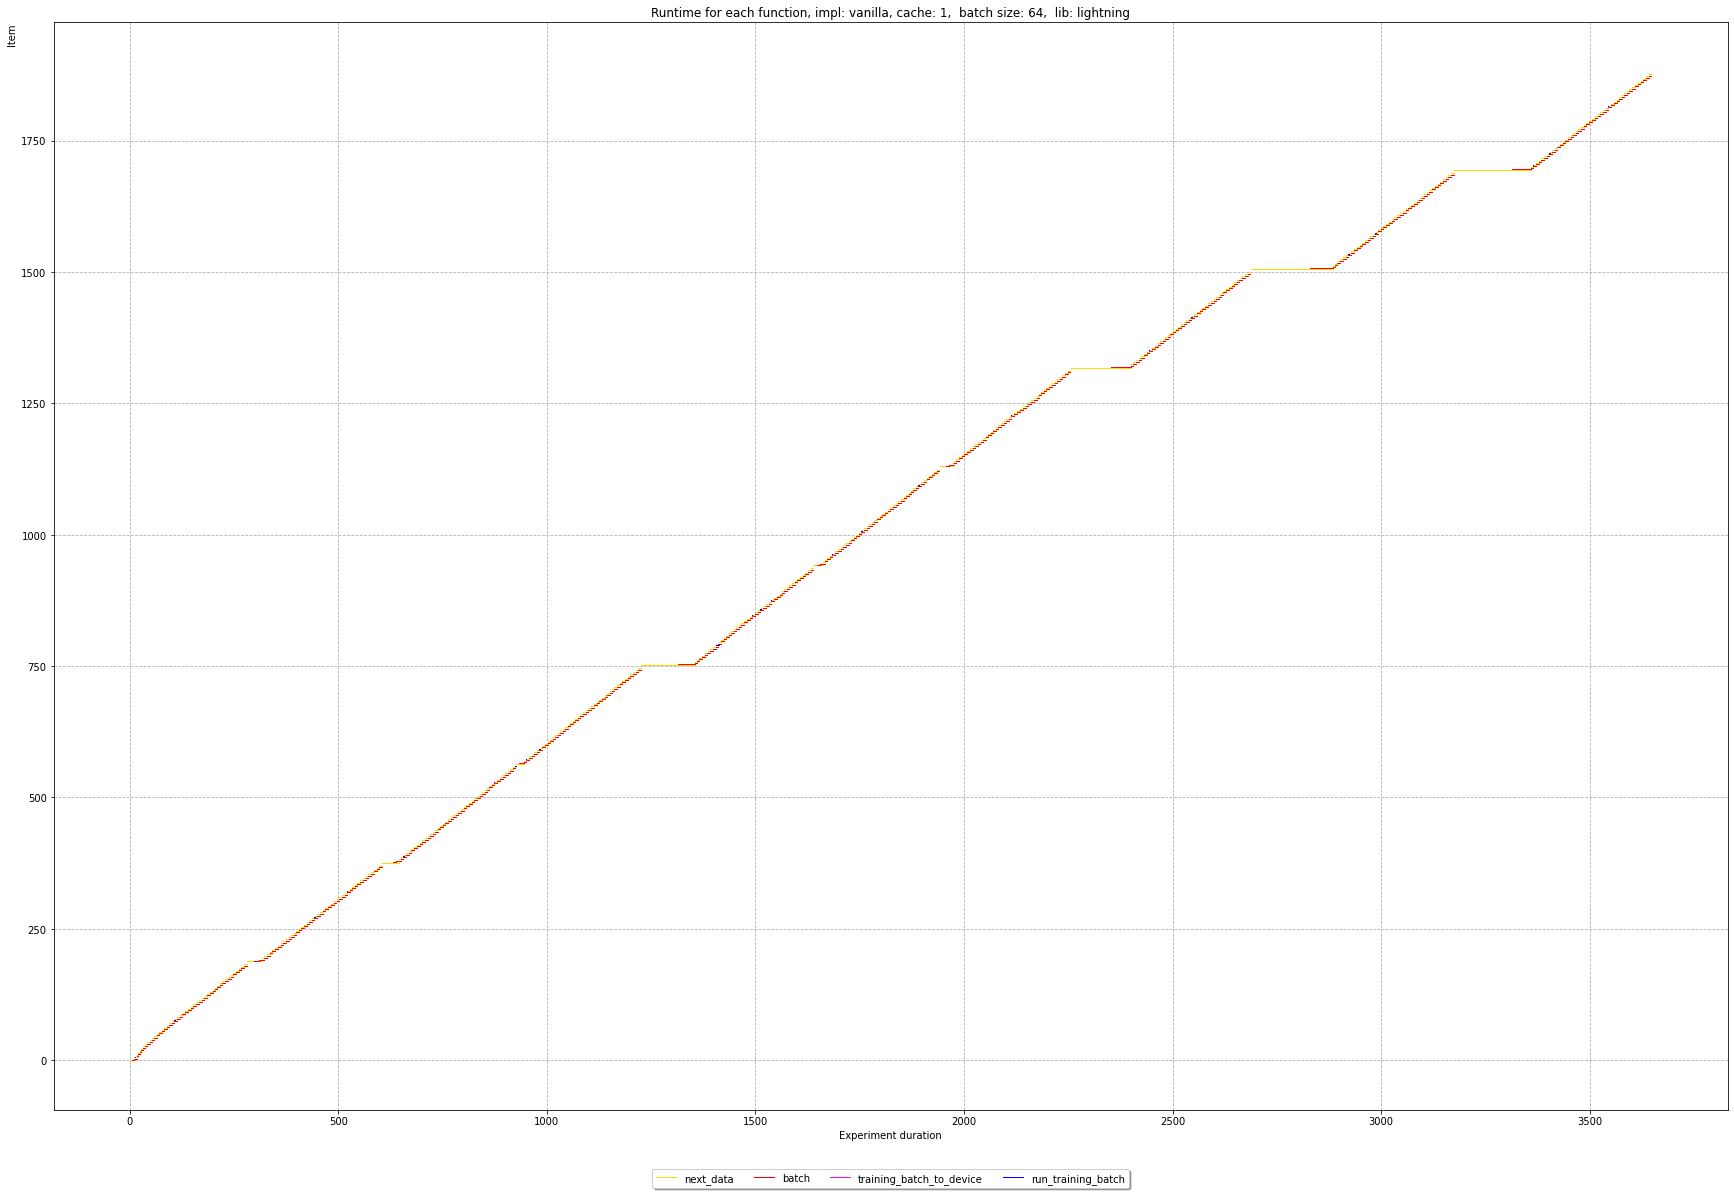

In [6]:
for implementation in ["torch", "lightning"]:
    for run in unique_runs_s3:
        if implementation in run:
            df = df_dataloader_s3[(df_dataloader_s3["run"]==run)]
            show_timelines(df, run, colors, False, False, 1)

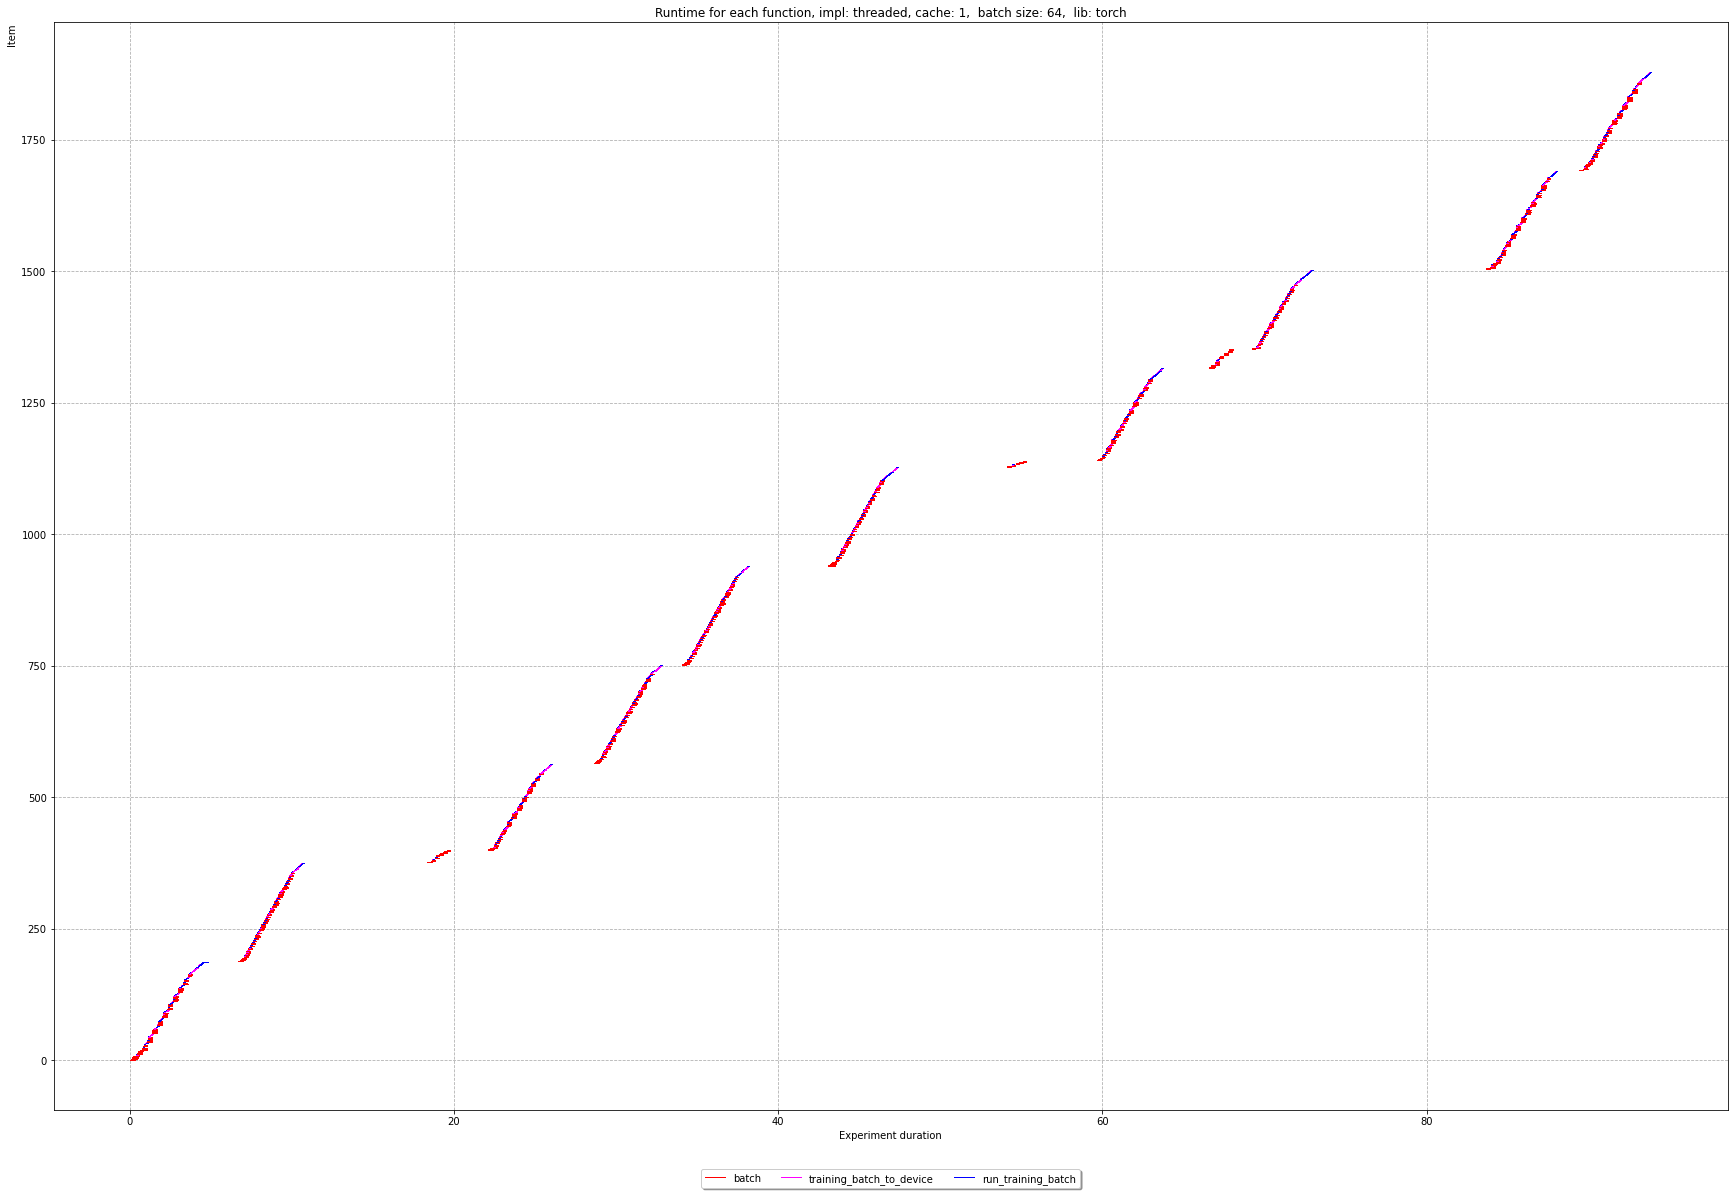

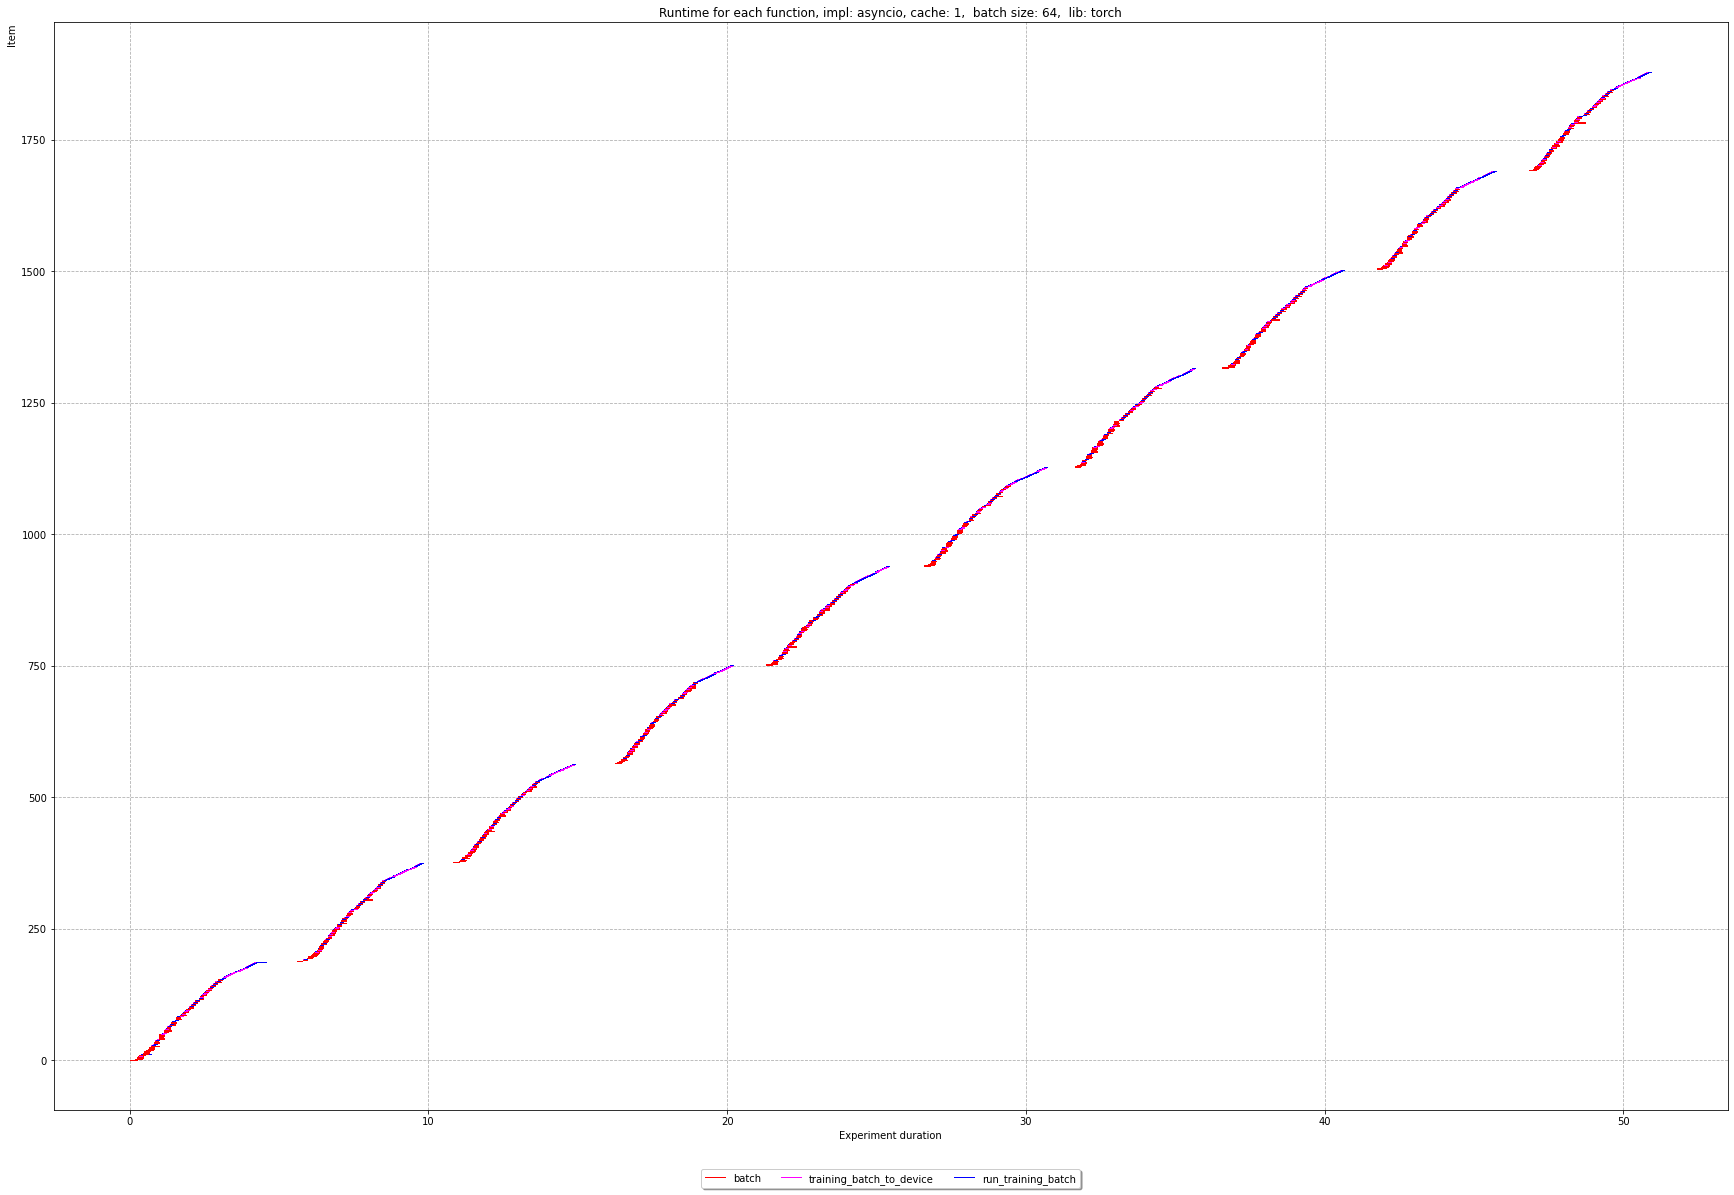

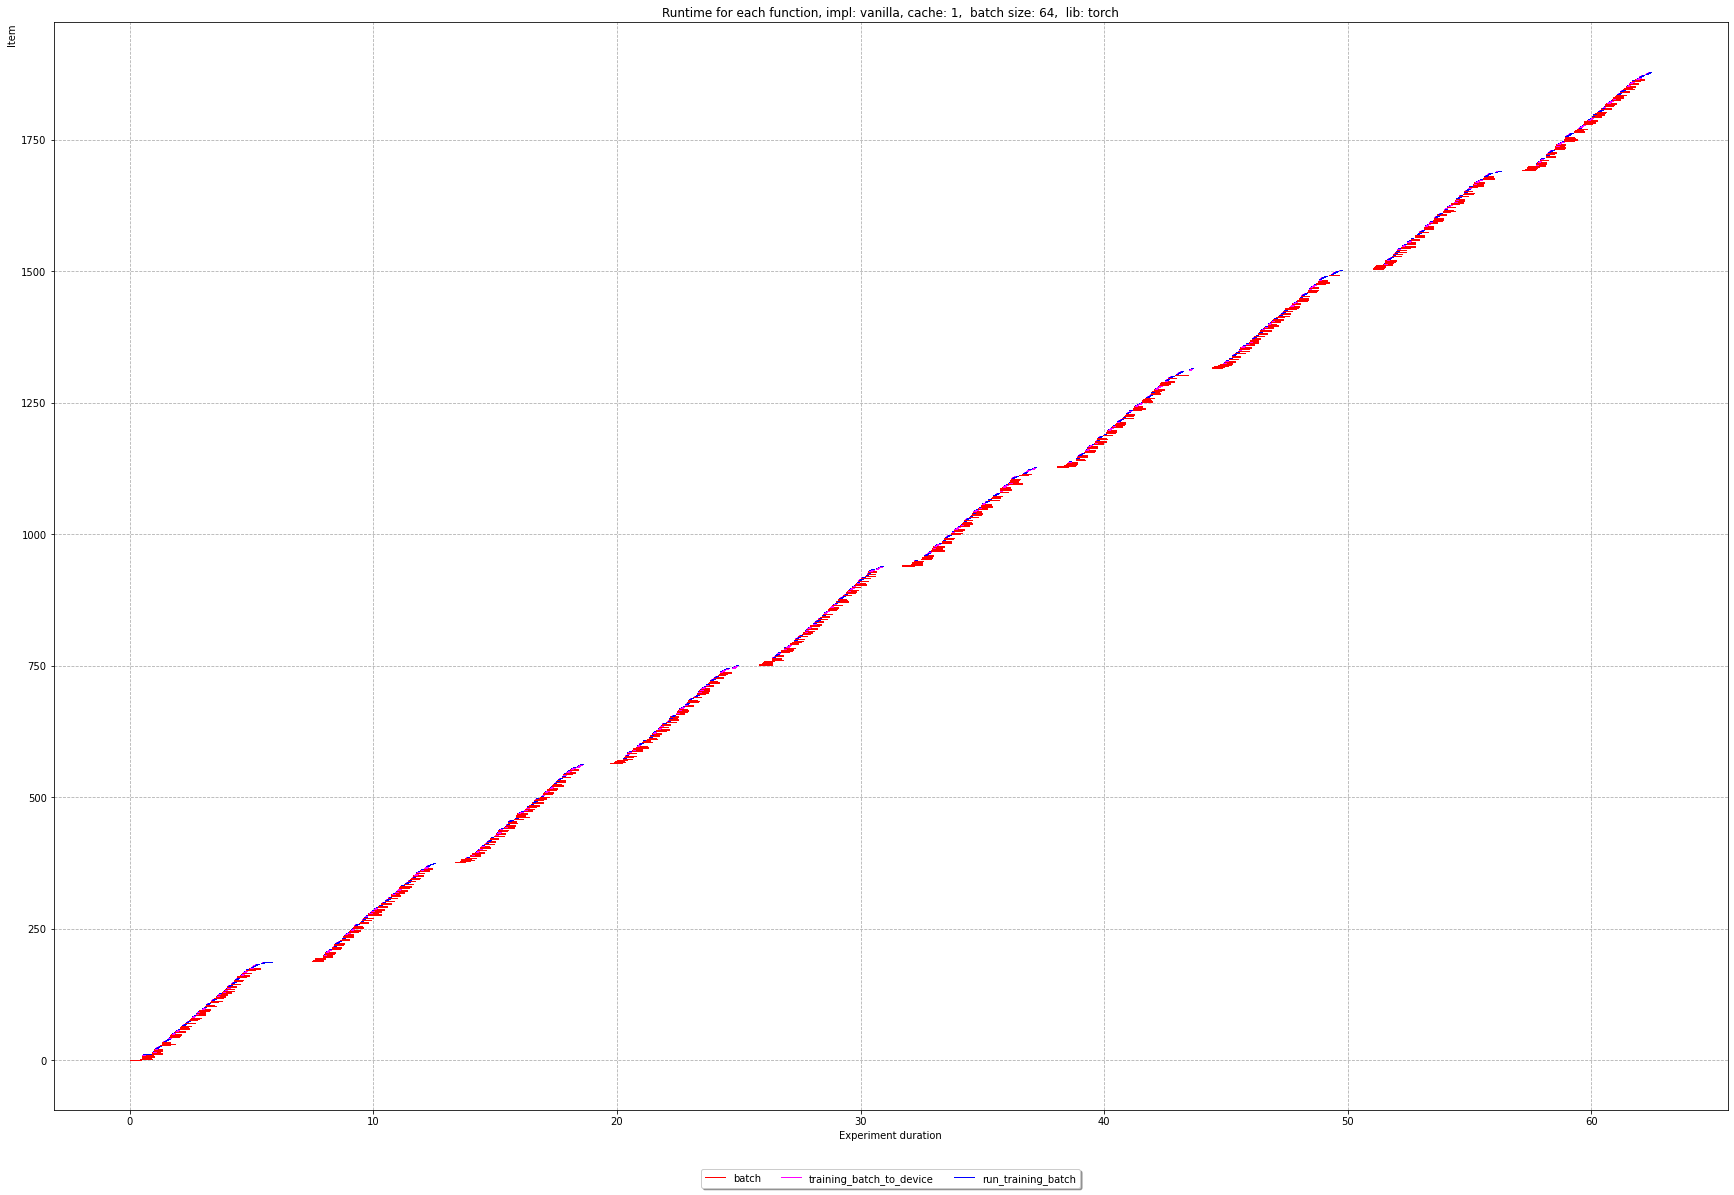

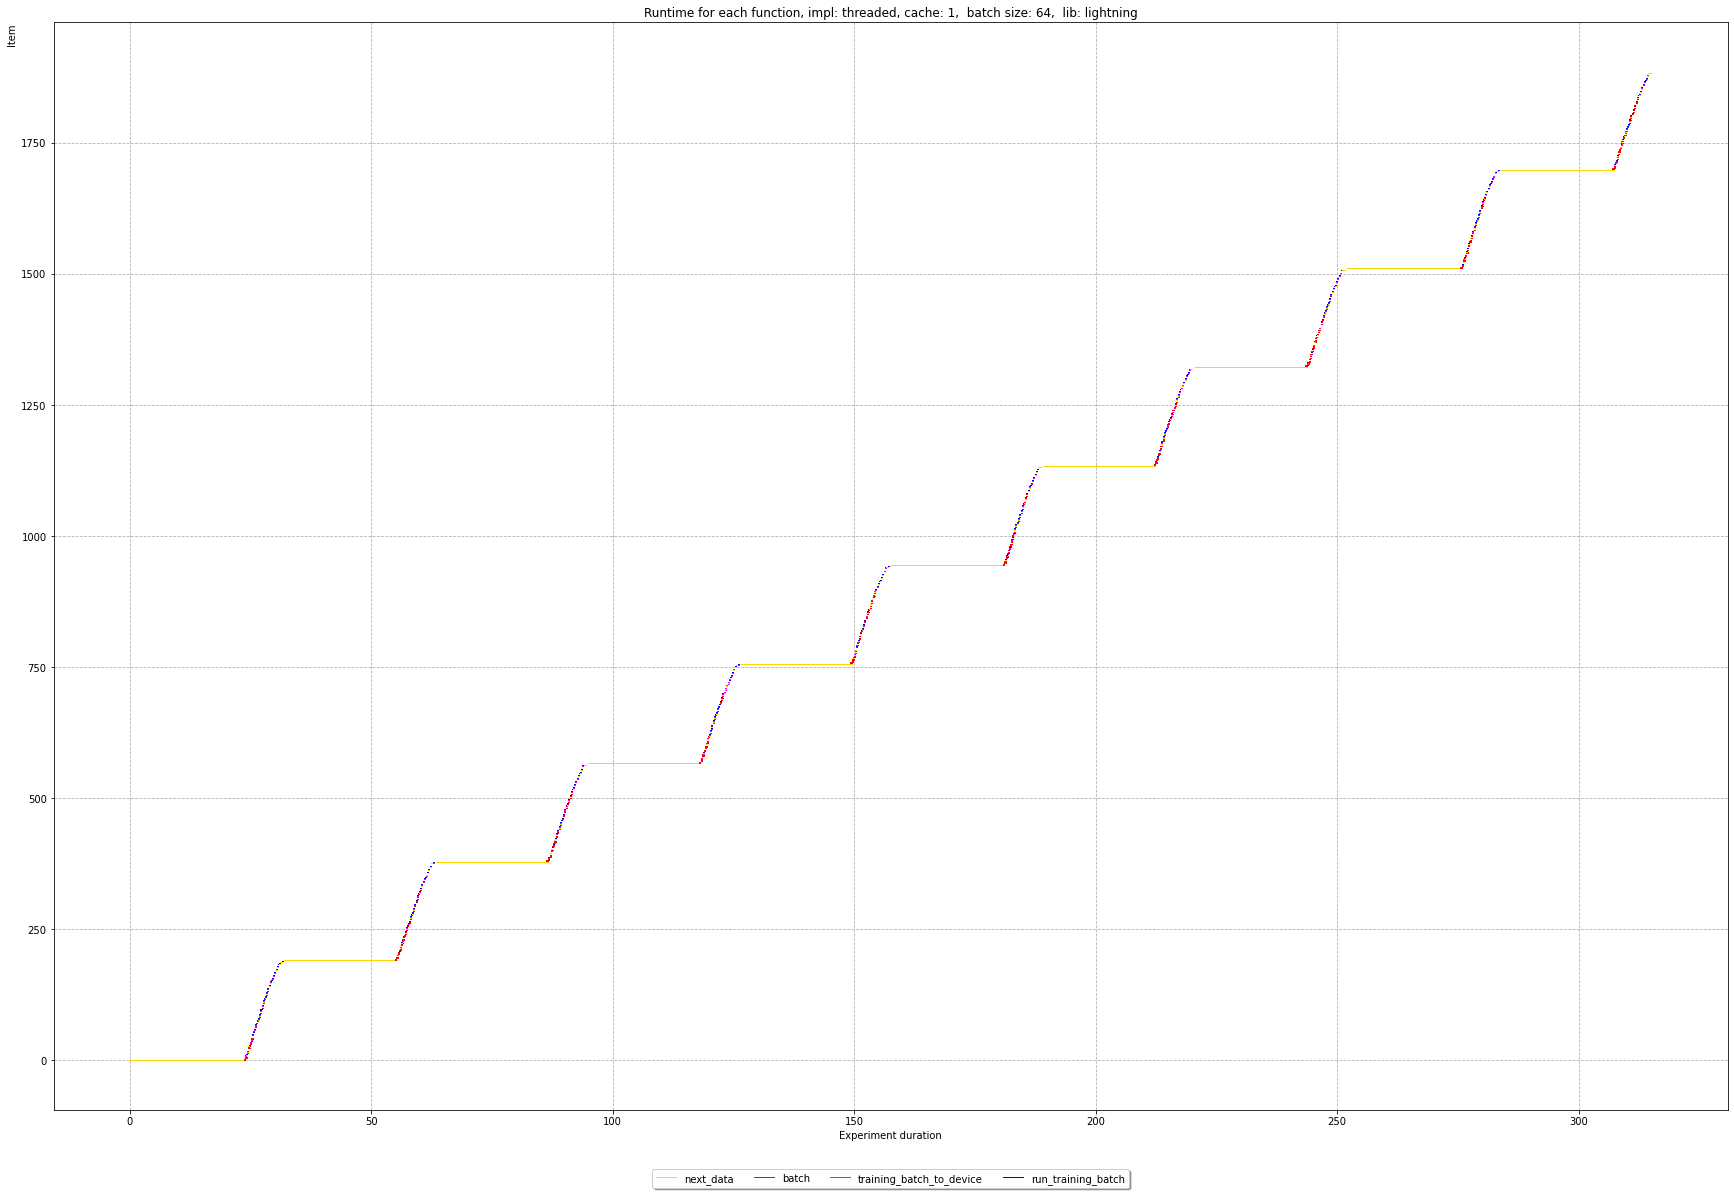

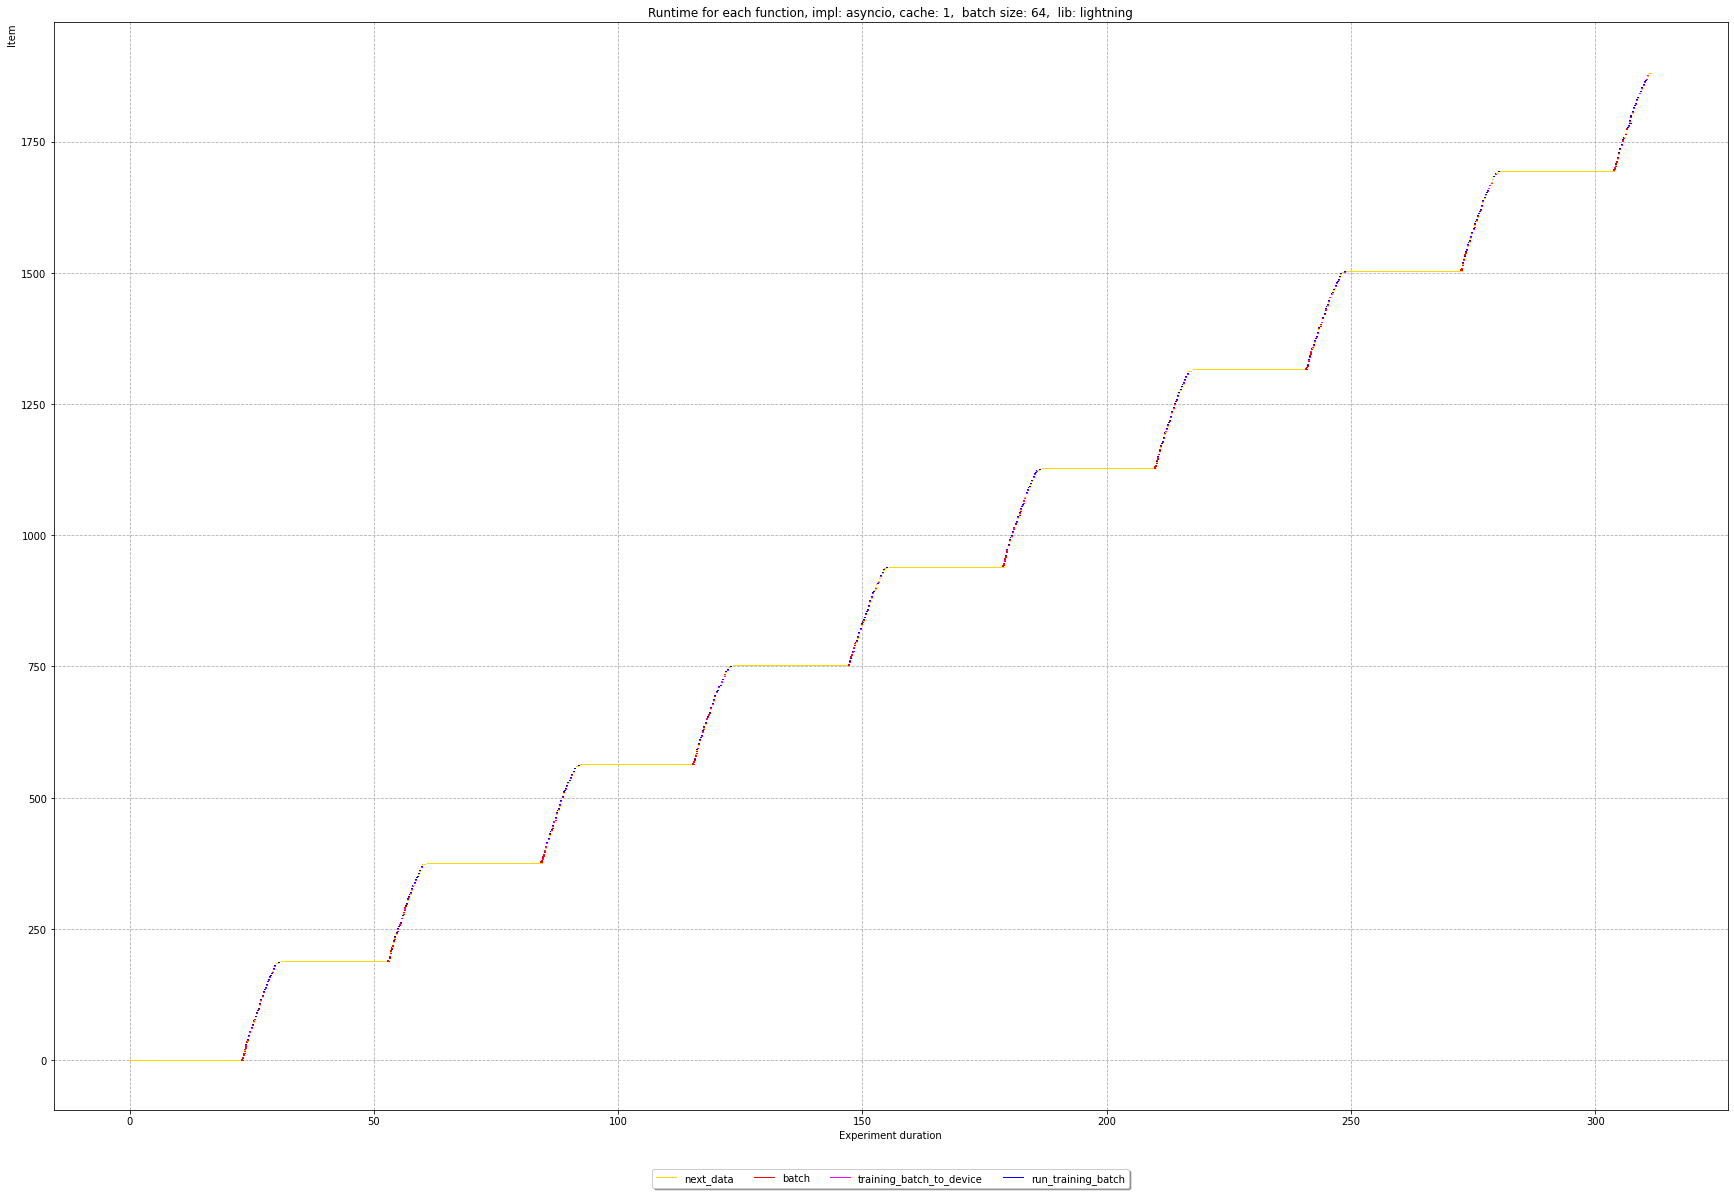

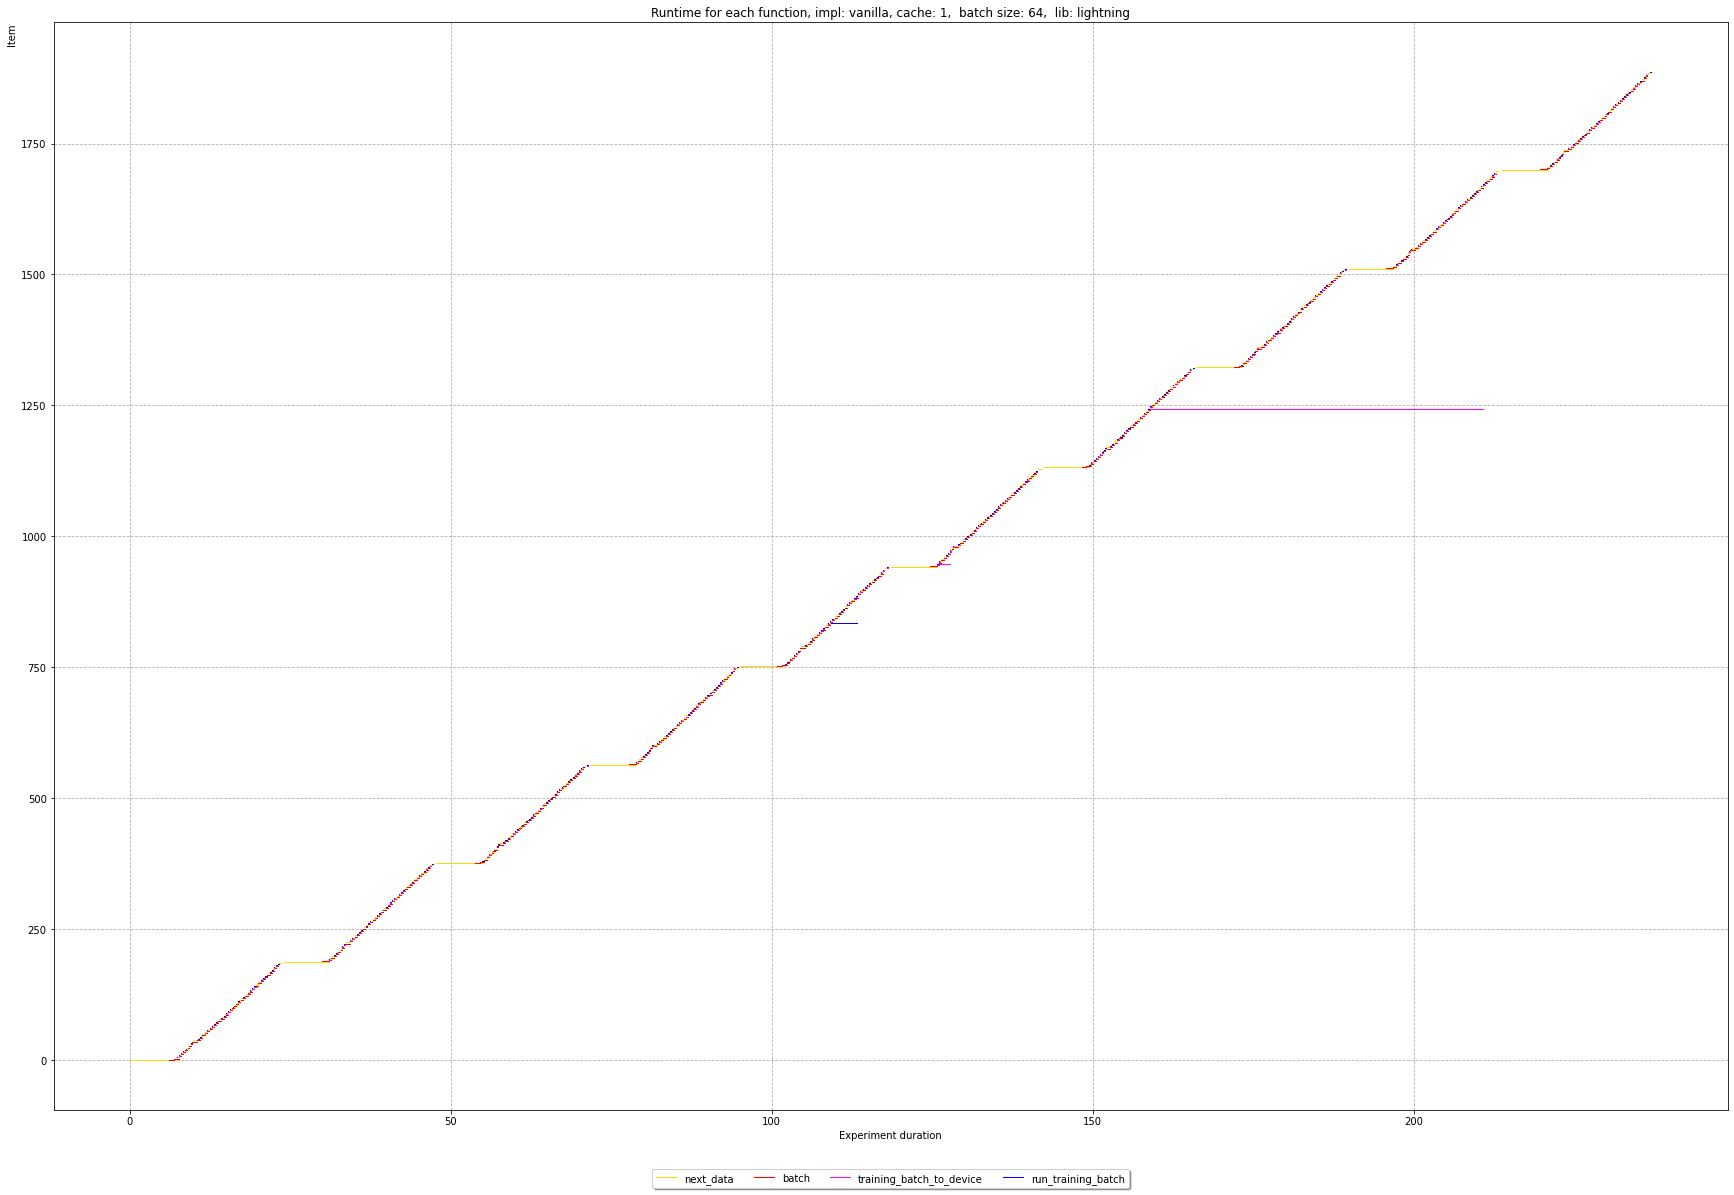

In [7]:
for implementation in ["torch", "lightning"]:
    for run in unique_runs_scratch:
        if implementation in run:
            df = df_dataloader_scratch[(df_dataloader_scratch["run"]==run)]
            show_timelines(df, run, colors, False, False, 1)

#### GPU utilization

In [8]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 9252.14it/s]


In [9]:
unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])
print(unique_runs_s3, unique_runs_scratch)

['20211118f090621_benchmark_e2e_torch_s3_64_4_16_1_threaded_sync'
 '20211118f091616_benchmark_e2e_lightning_s3_64_4_16_1_threaded_sync'
 '20211118f093102_benchmark_e2e_torch_s3_64_4_16_1_asyncio_sync'
 '20211118f093632_benchmark_e2e_lightning_s3_64_4_16_1_asyncio_sync'
 '20211118f095018_benchmark_e2e_torch_s3_64_4_16_1_vanilla_sync'
 '20211118f095518_benchmark_e2e_lightning_s3_64_4_16_1_vanilla_sync'] ['20211118f092349_benchmark_e2e_torch_scratch_64_4_16_1_threaded_sync'
 '20211118f092535_benchmark_e2e_lightning_scratch_64_4_16_1_threaded_sync'
 '20211118f094356_benchmark_e2e_torch_scratch_64_4_16_1_asyncio_sync'
 '20211118f094455_benchmark_e2e_lightning_scratch_64_4_16_1_asyncio_sync'
 '20211118f105618_benchmark_e2e_torch_scratch_64_4_16_1_vanilla_sync'
 '20211118f105735_benchmark_e2e_lightning_scratch_64_4_16_1_vanilla_sync']


45.14141414141414 28.337078651685392


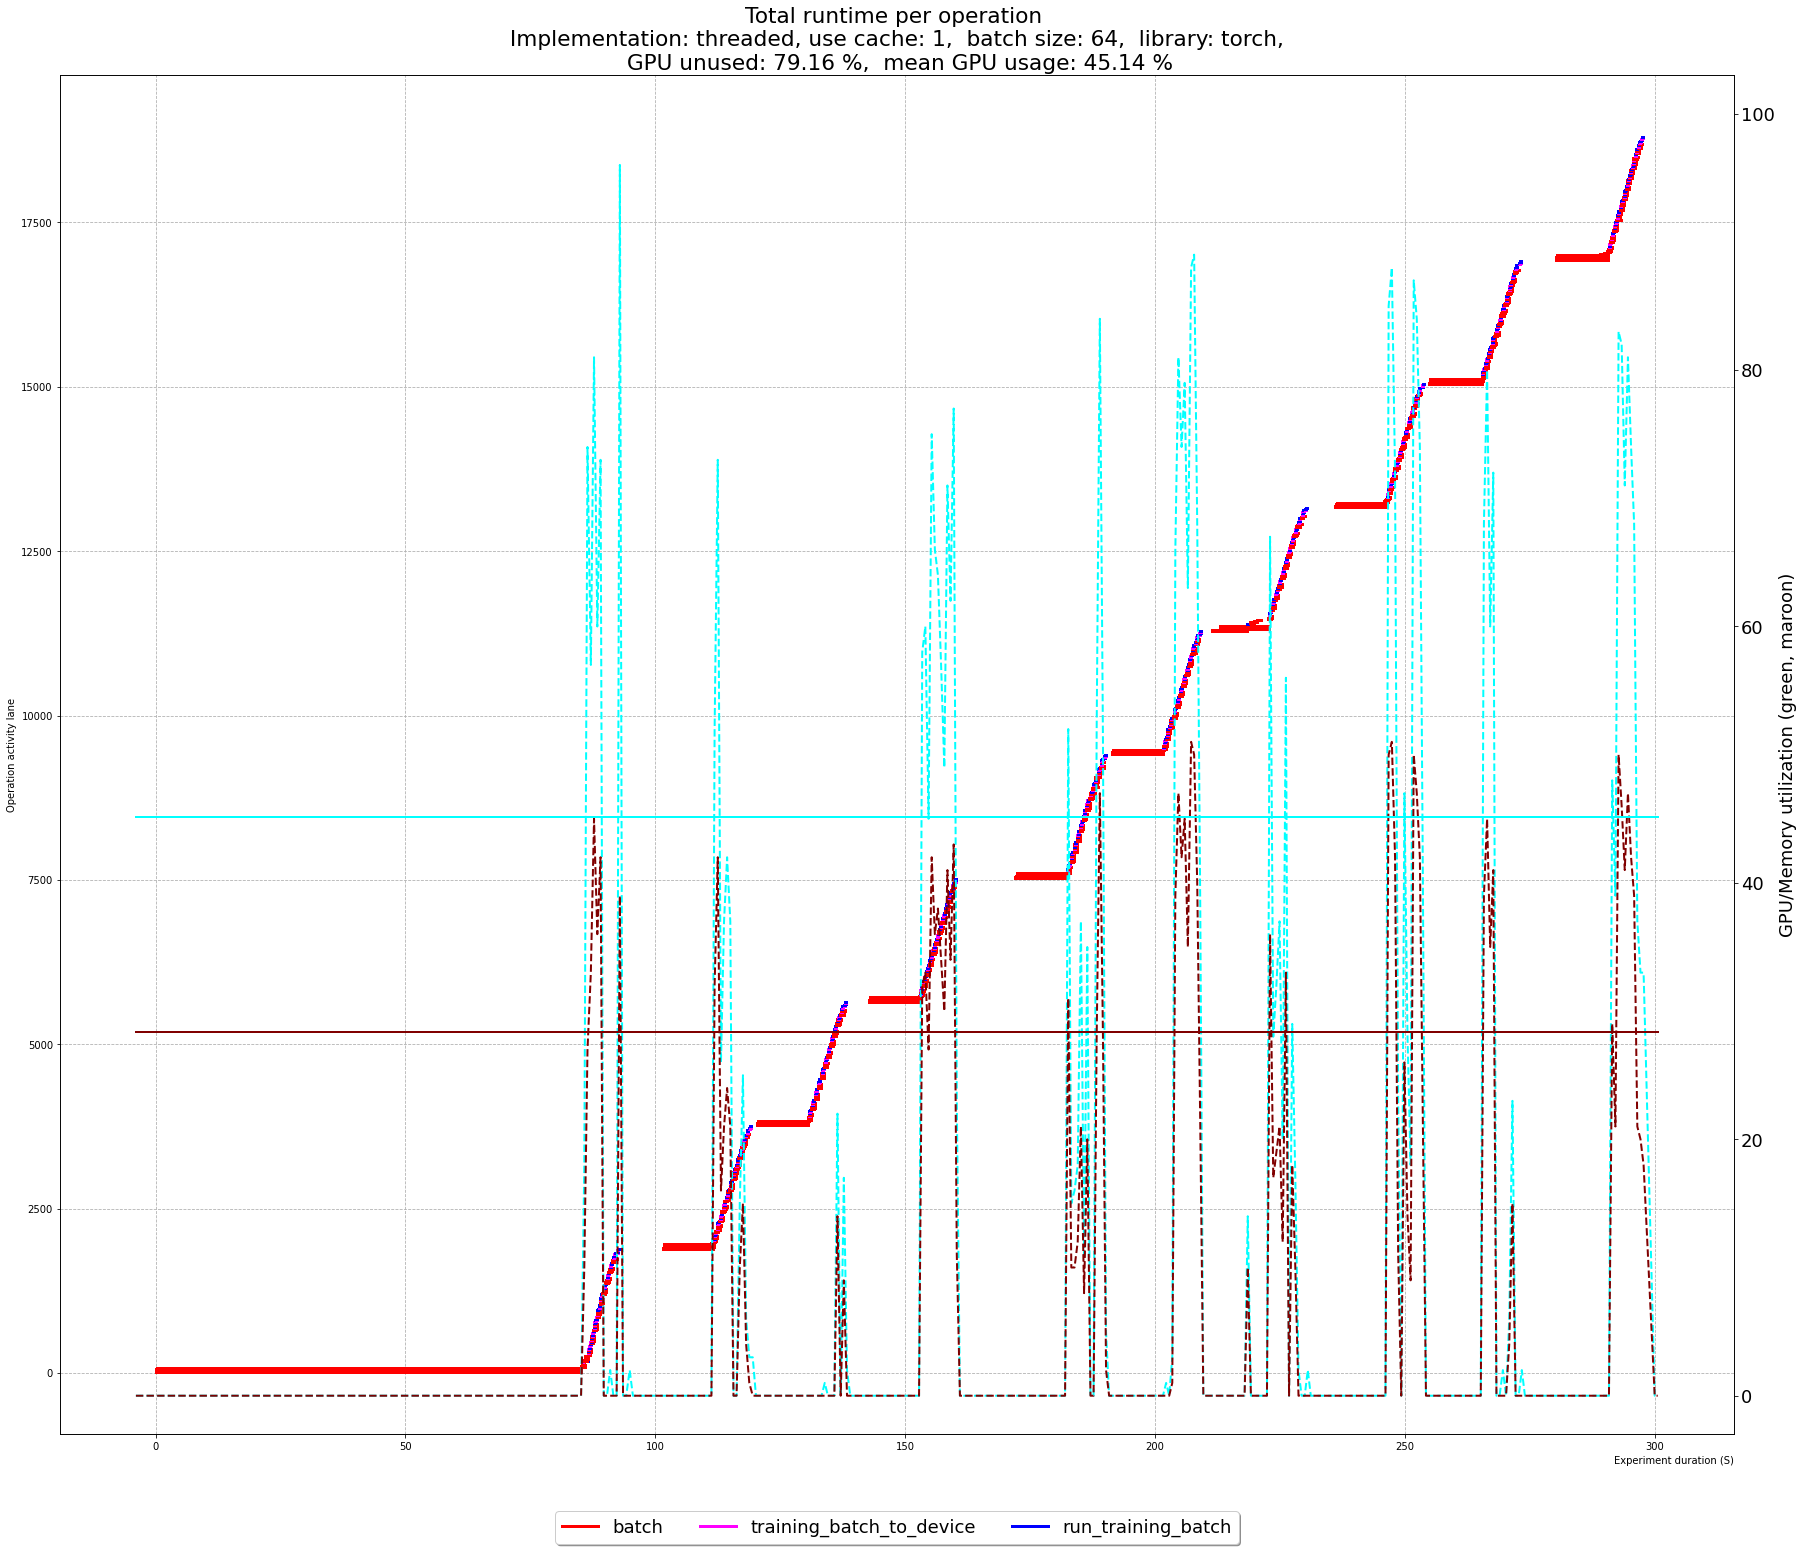

42.037593984962406 14.75


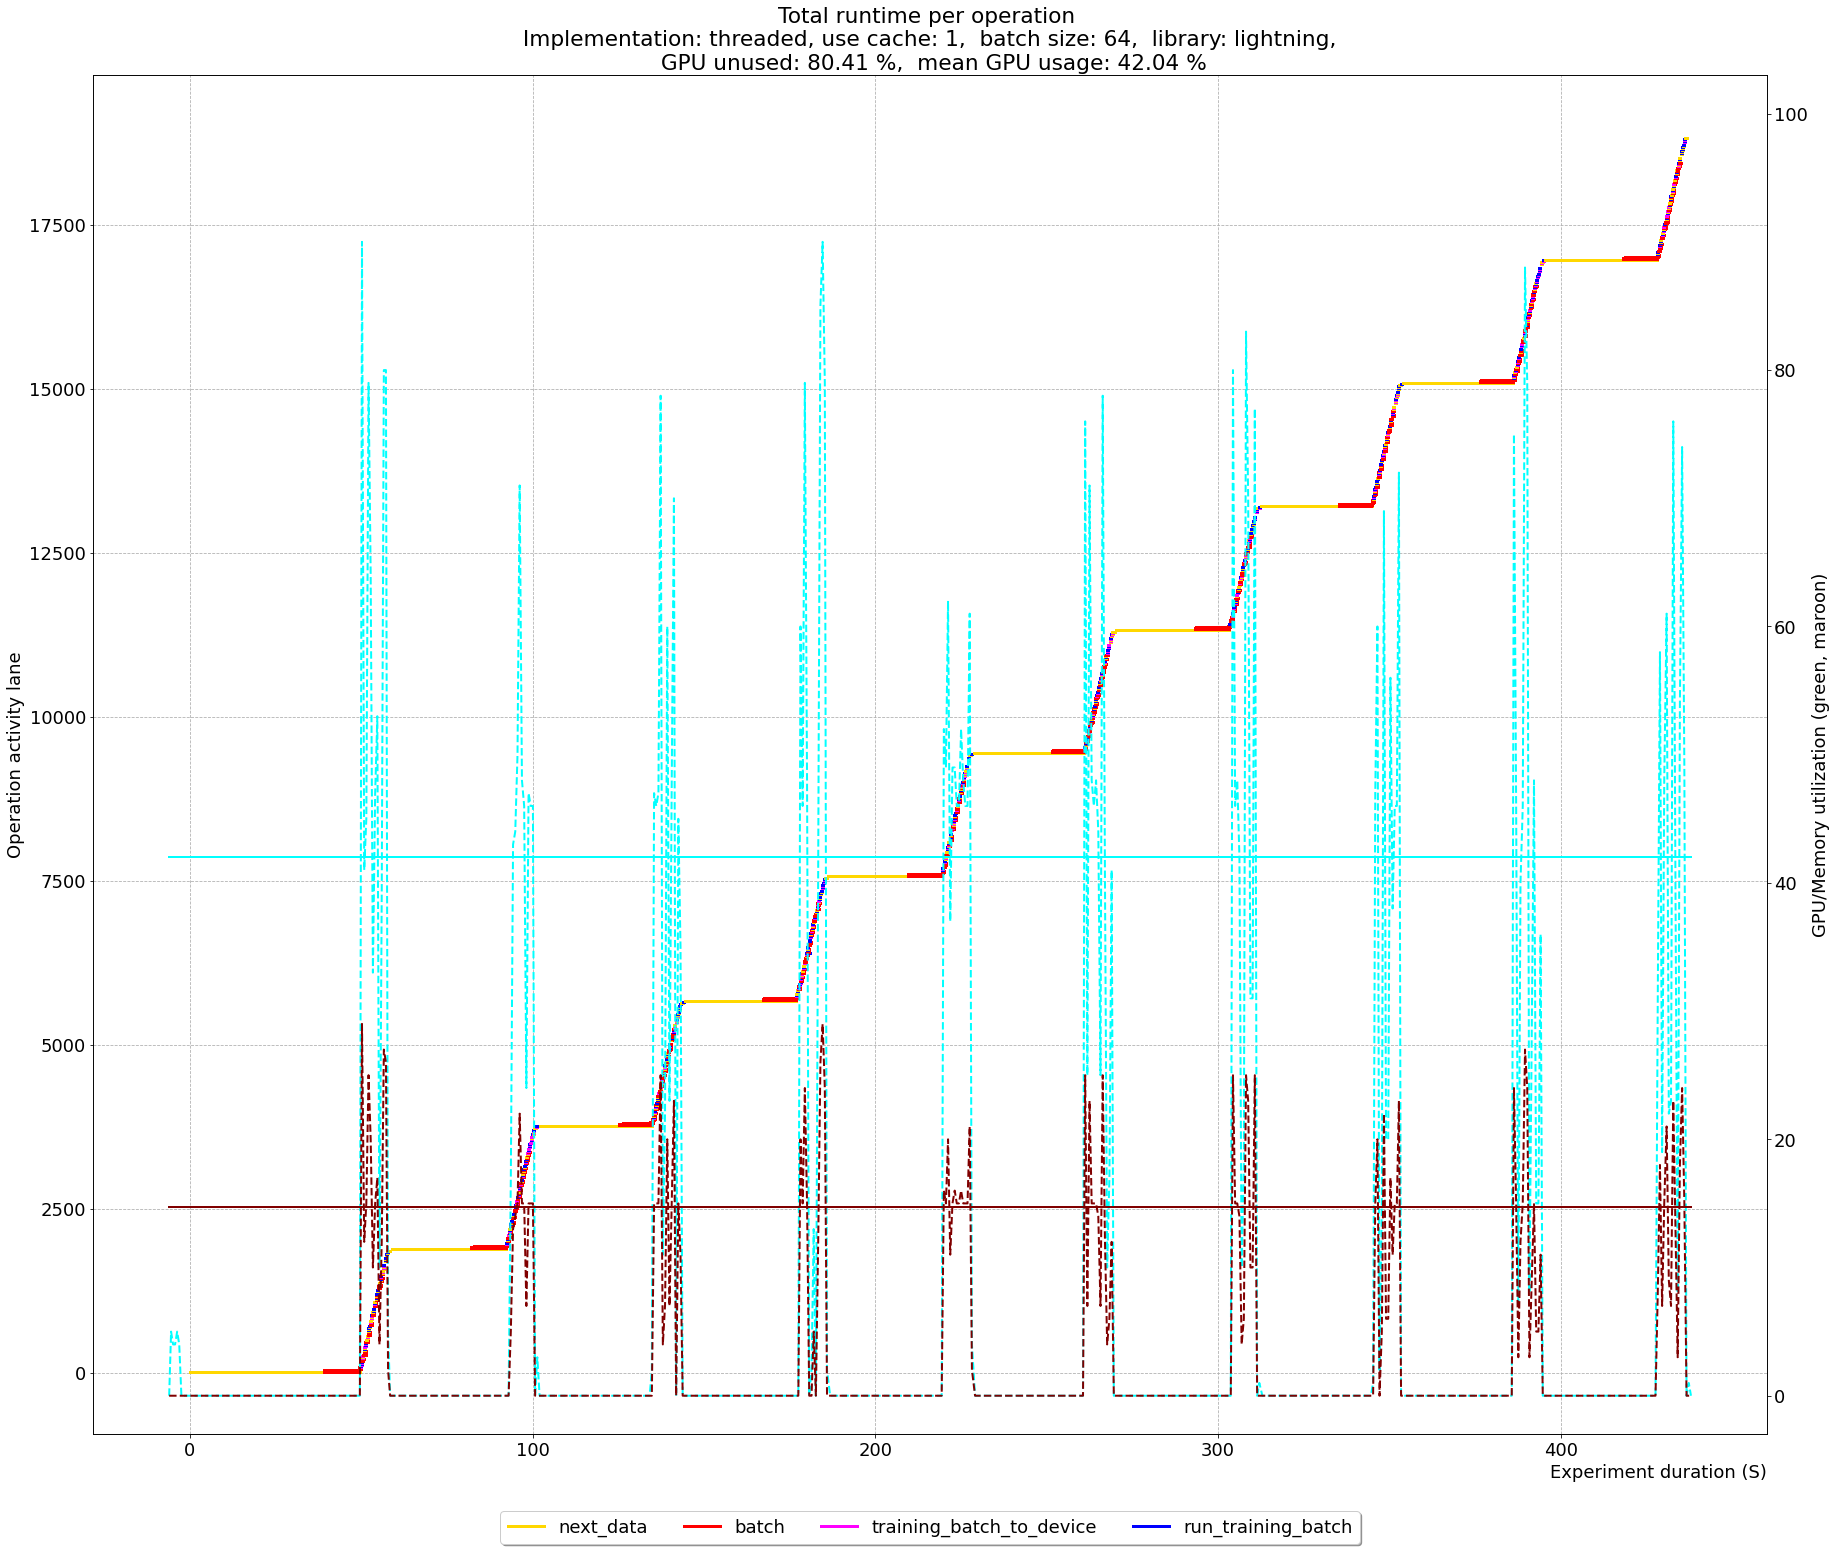

36.27058823529412 24.554054054054053


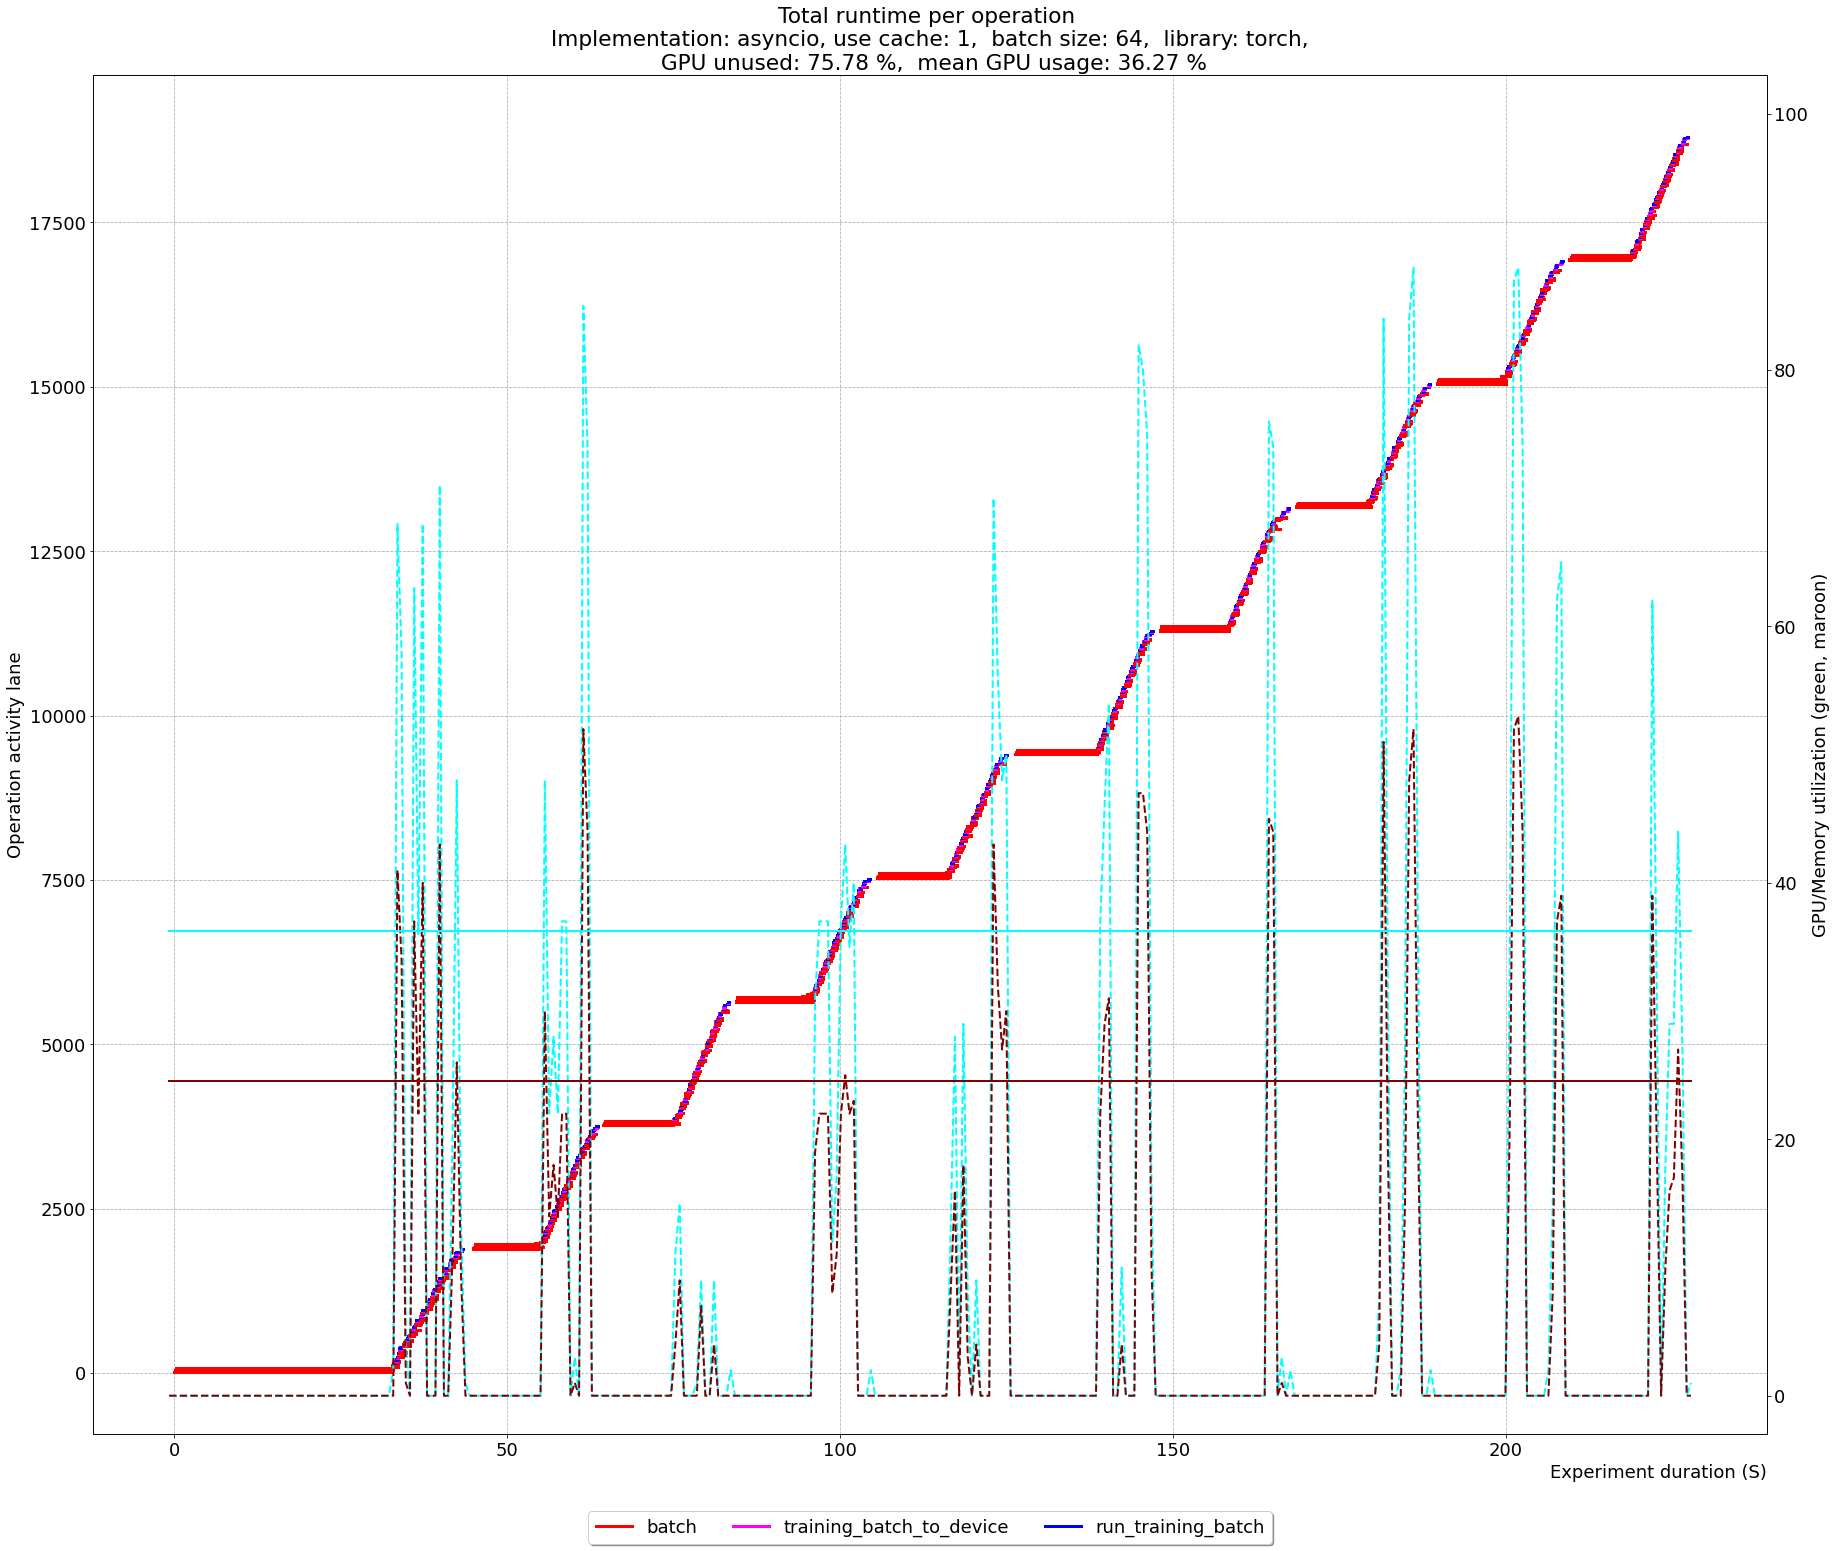

39.678082191780824 13.544117647058824


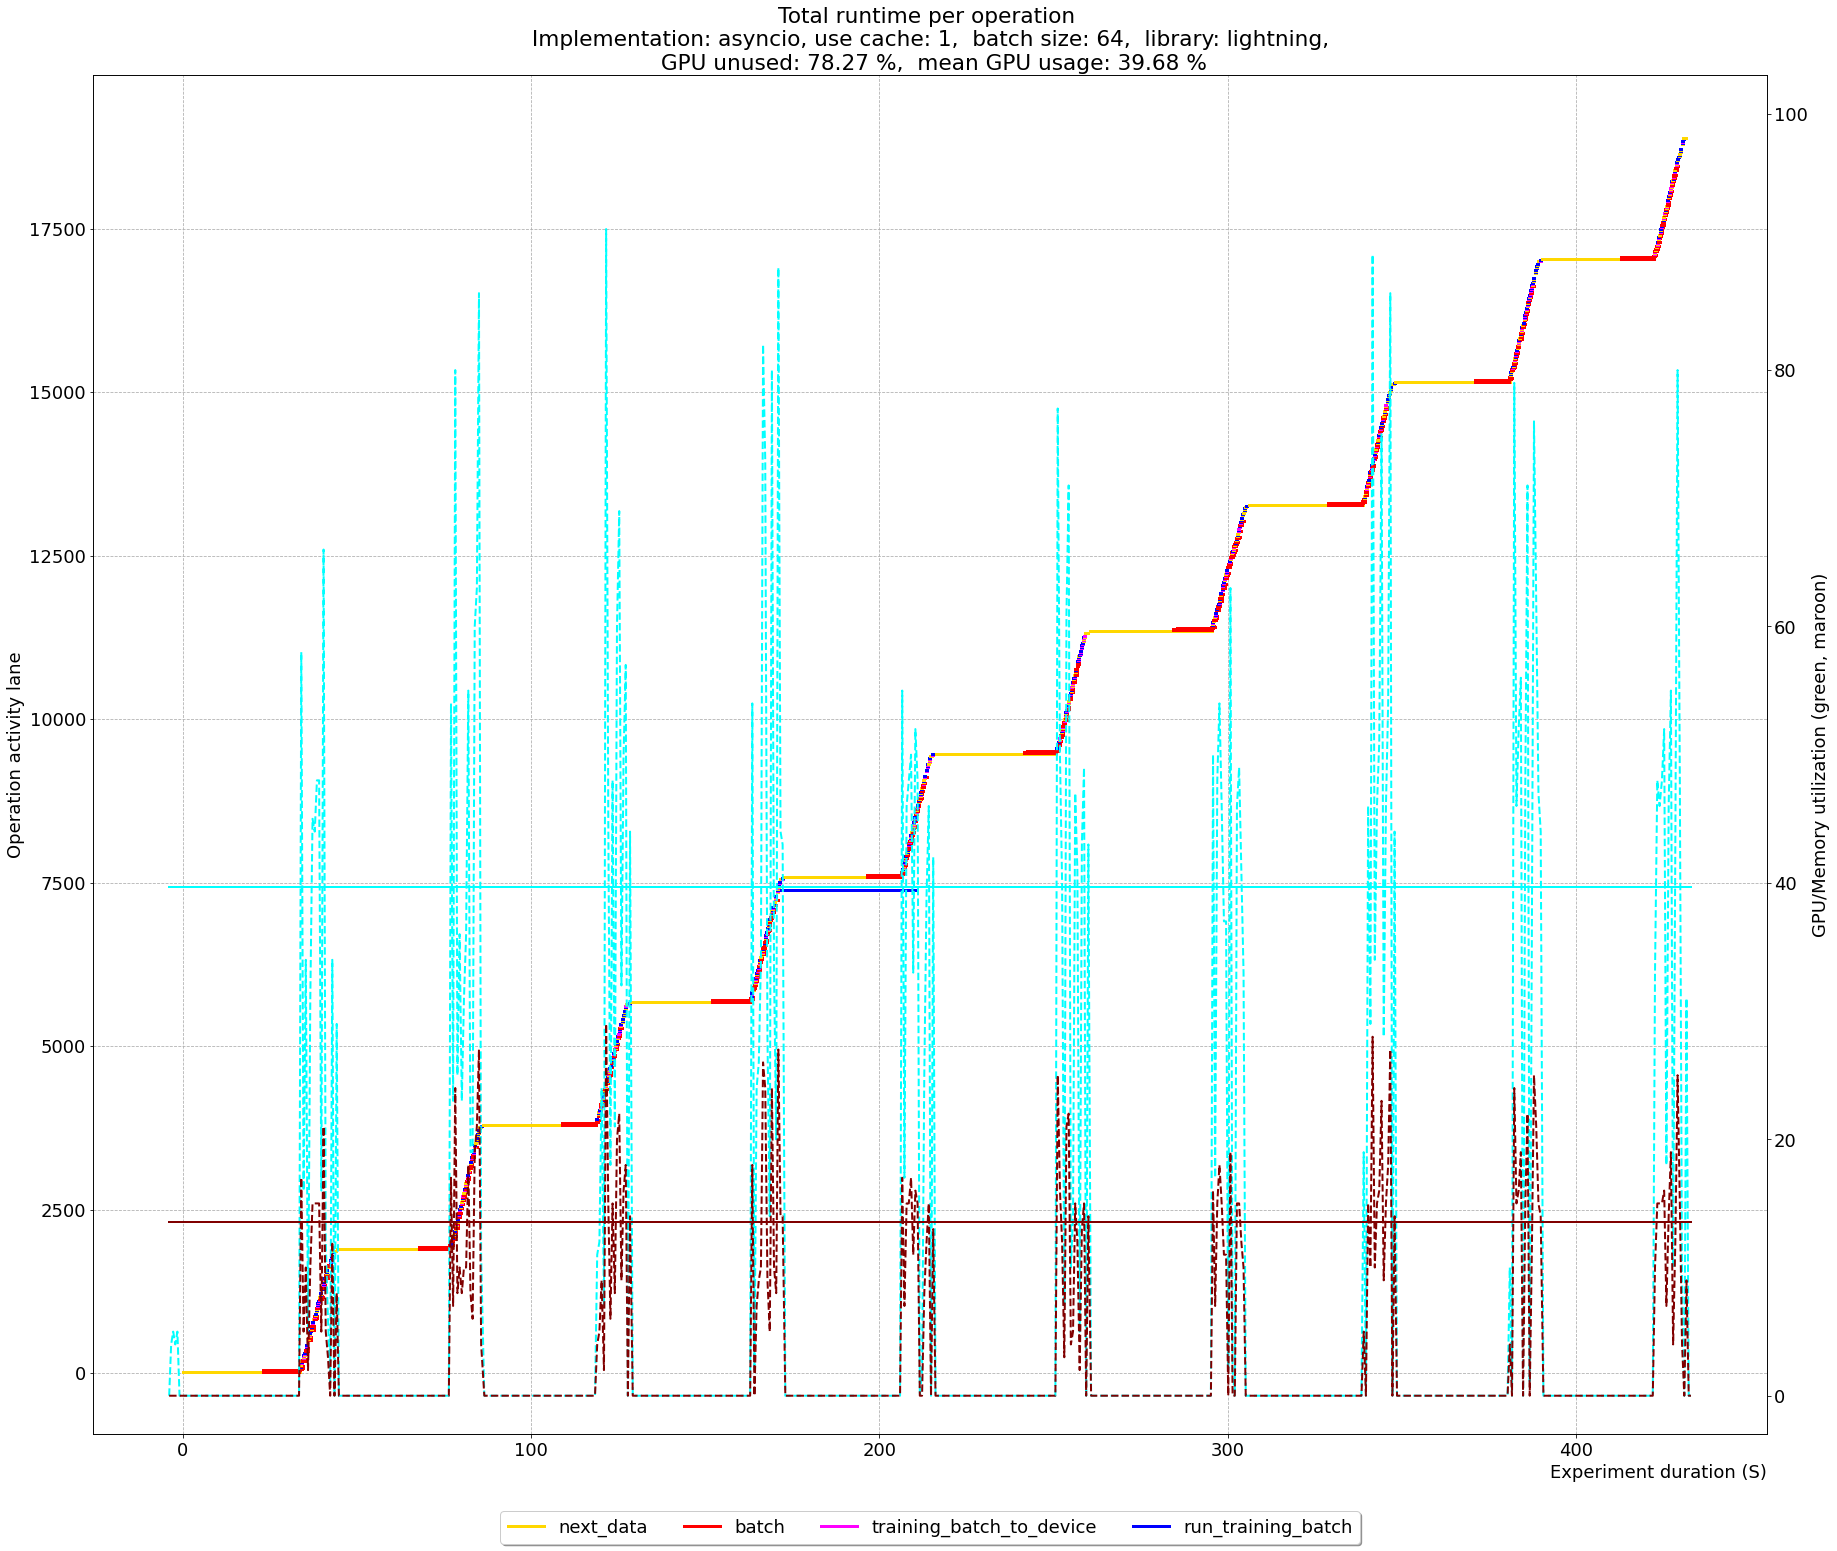

44.16949152542373 25.666666666666668


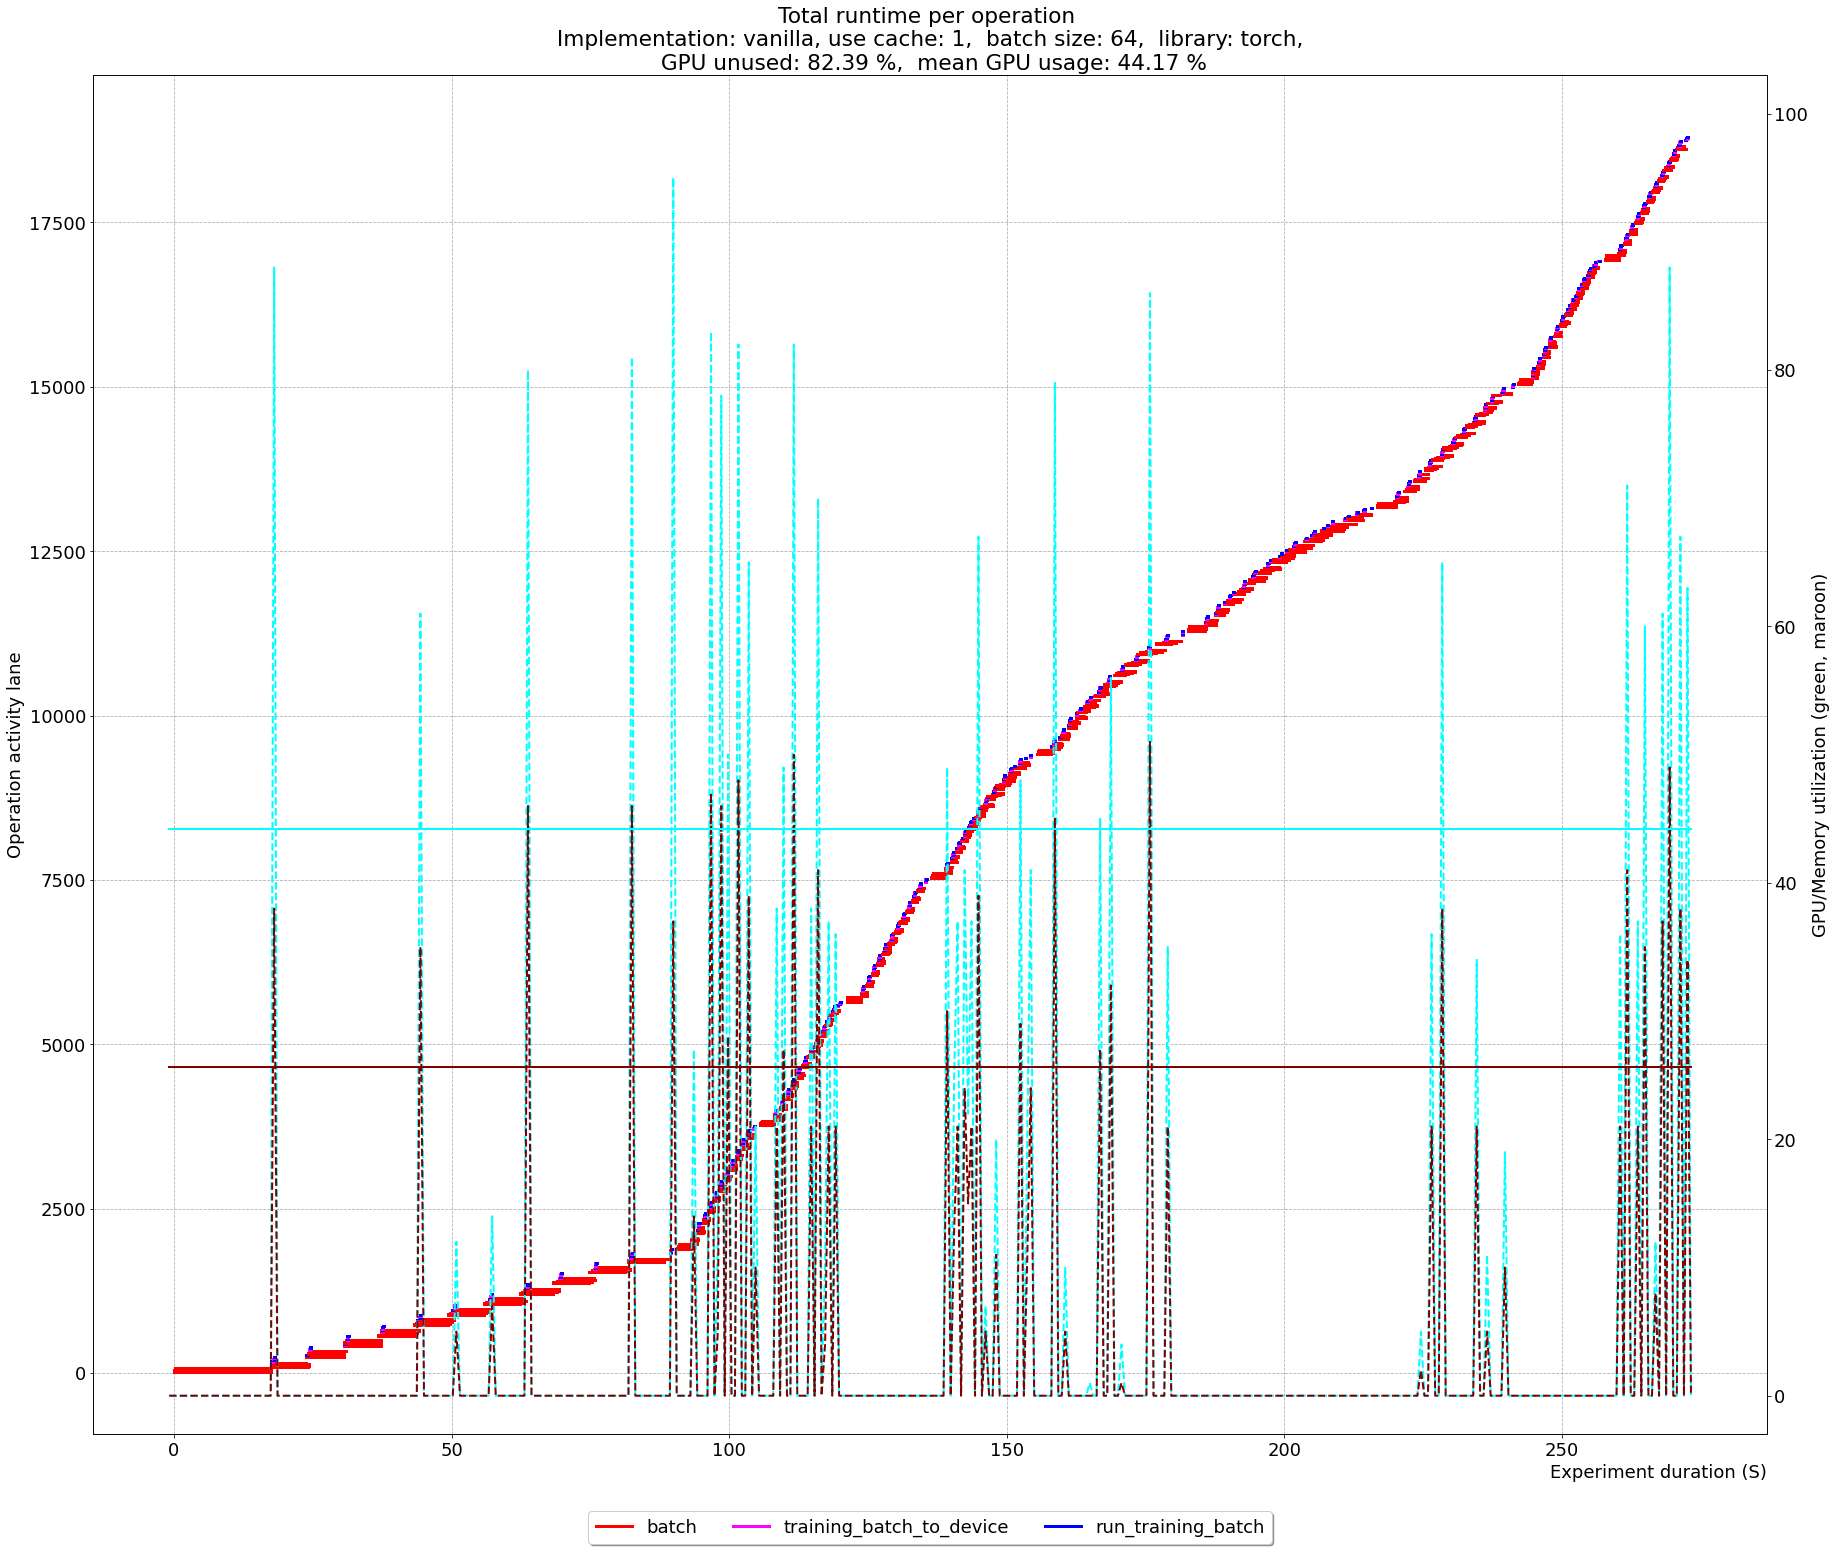

29.679425837320576 10.32972972972973


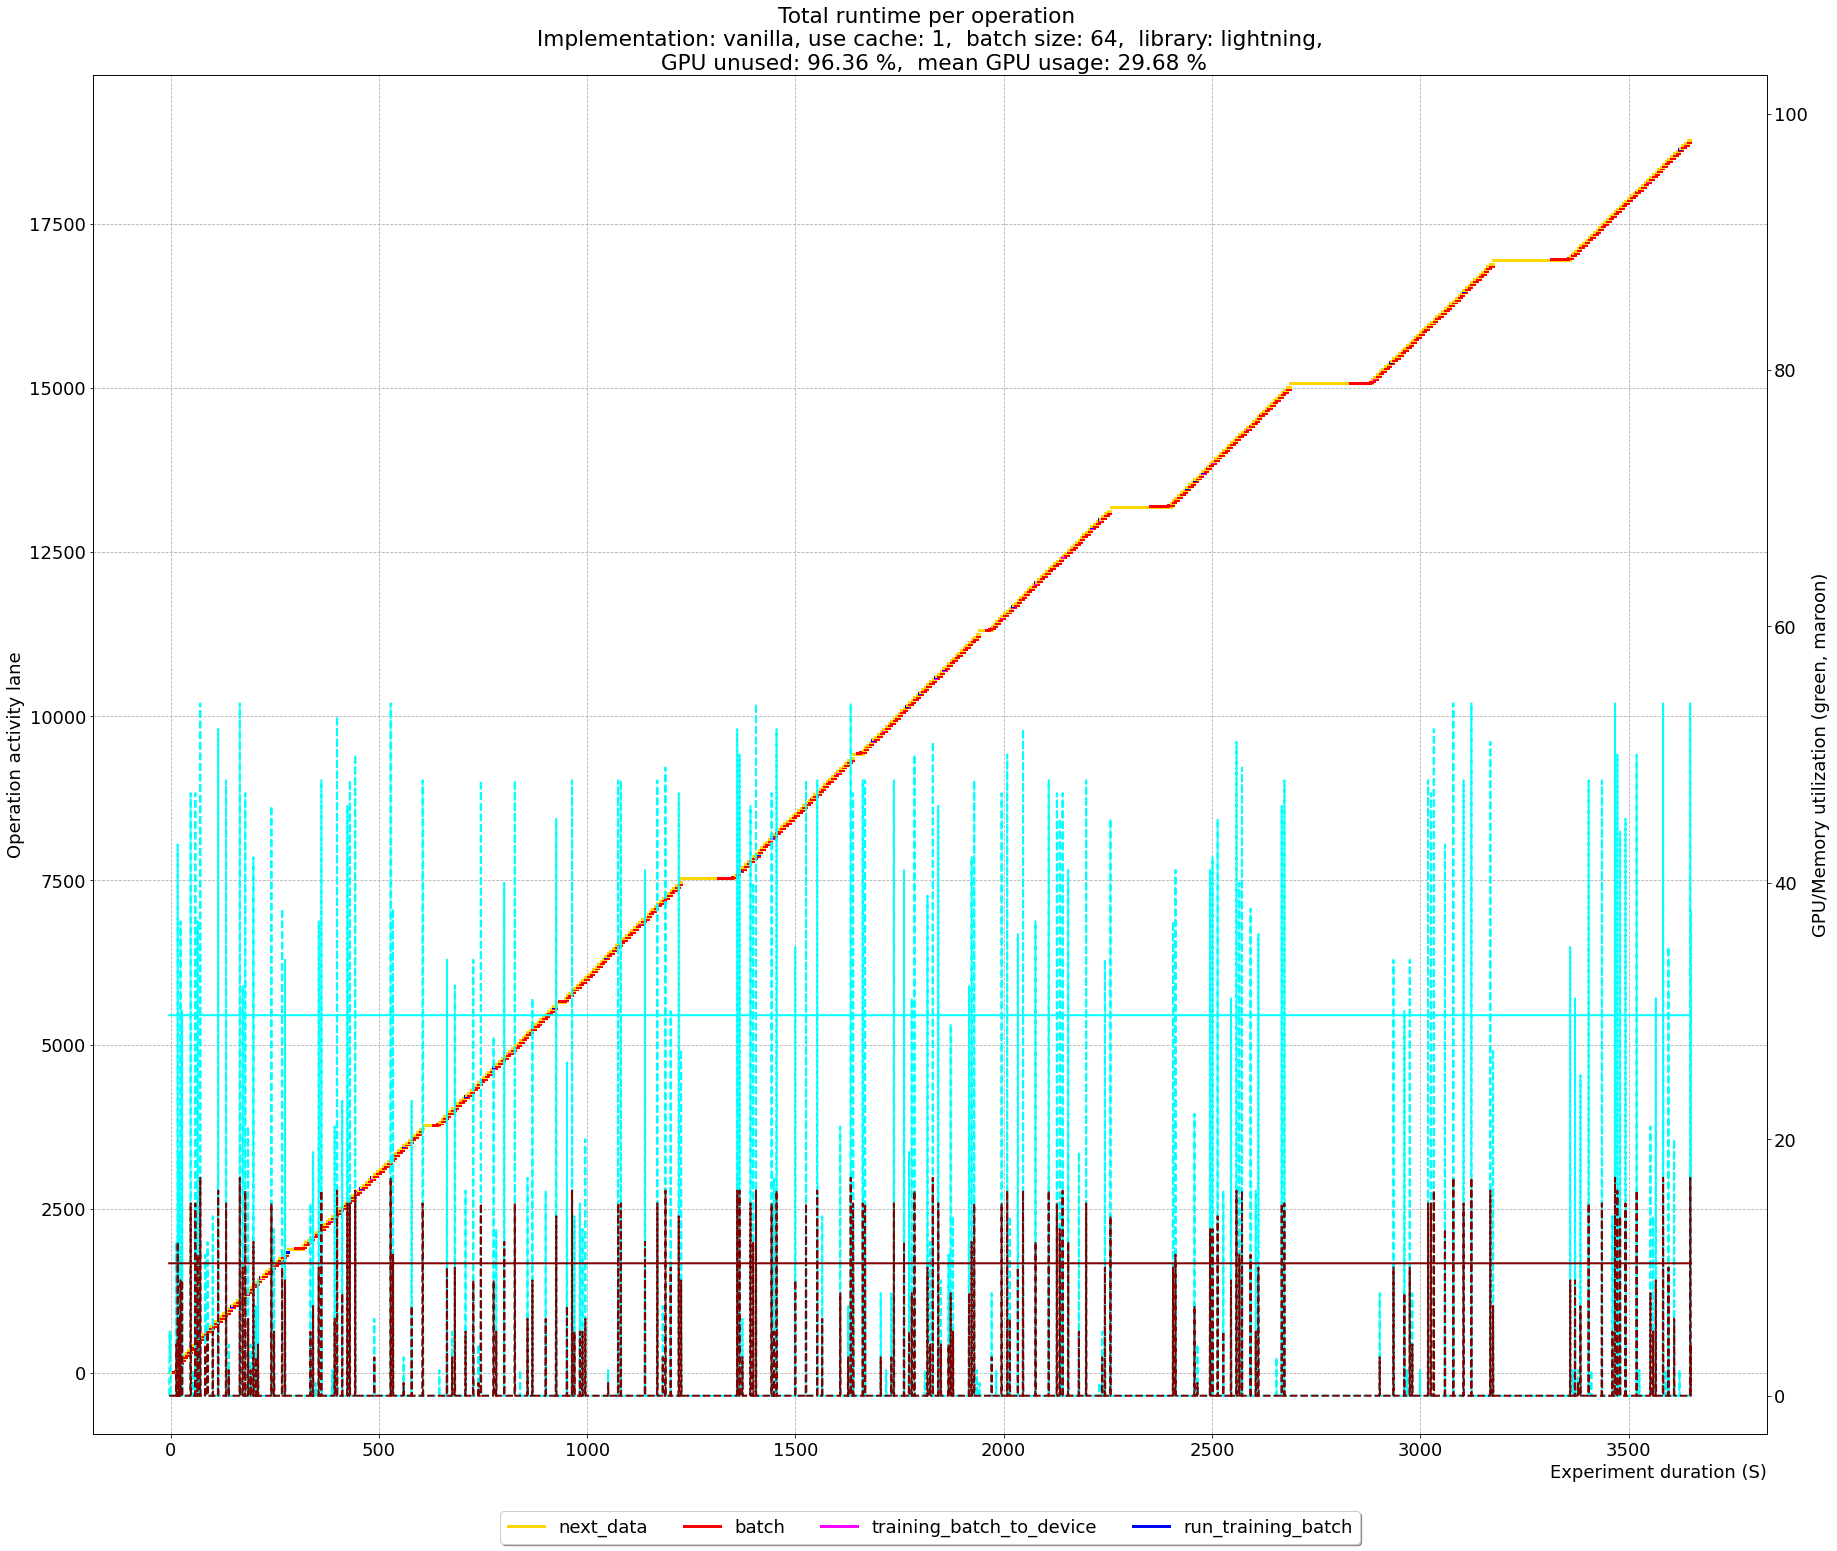

In [10]:
returns_s3 = []
for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    returns_s3.append(show_timelines_with_gpu(df, dfgpu, colors, run, False, True, False, 2))

61.52238805970149 34.203125


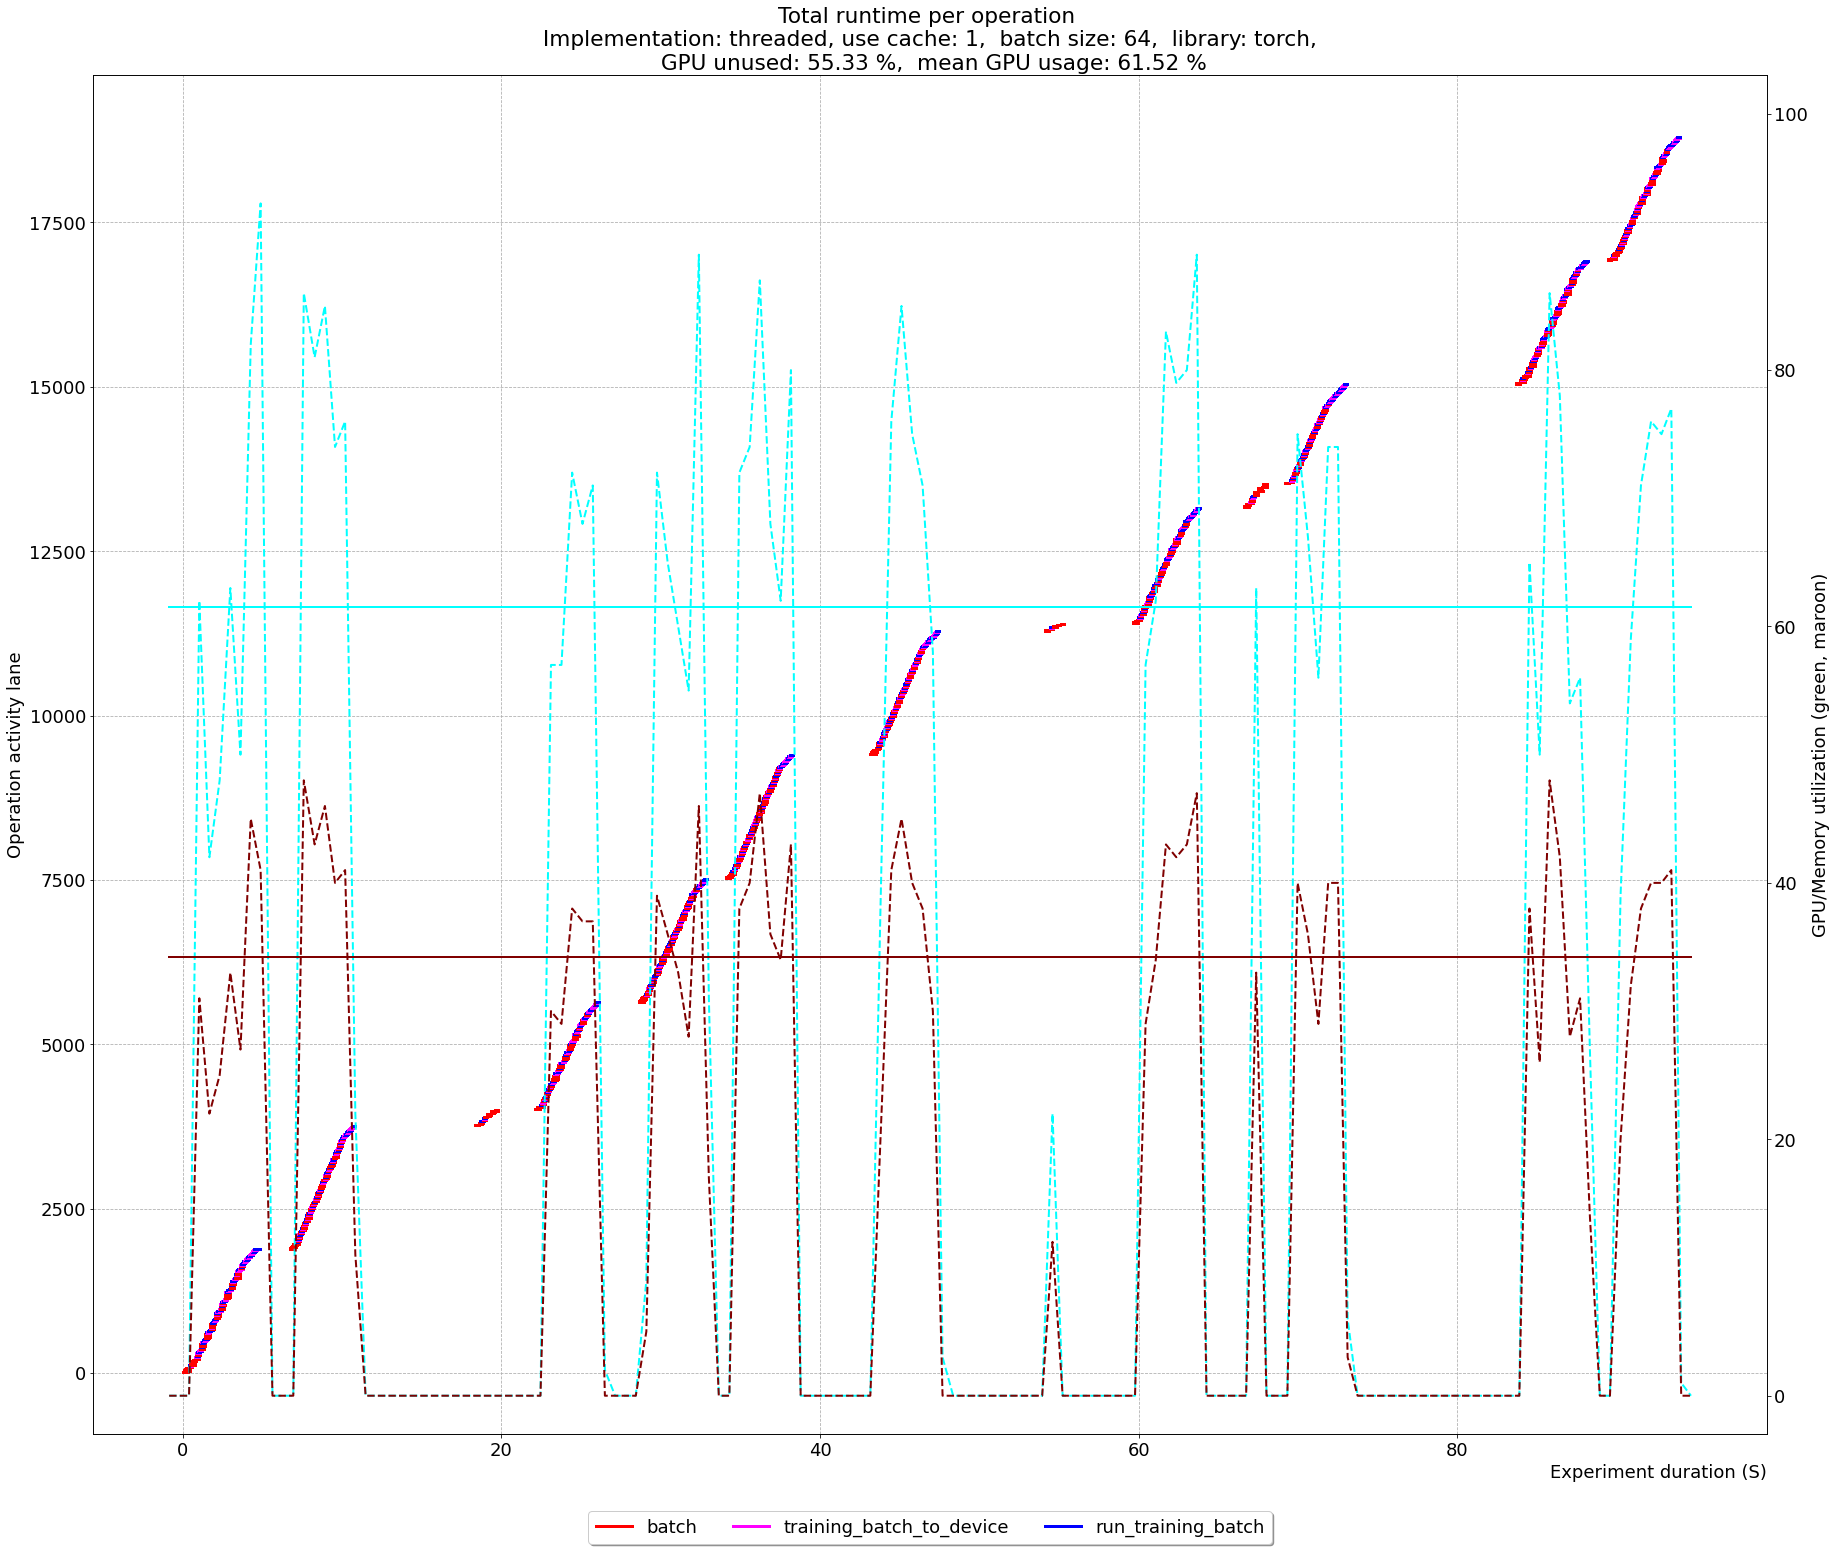

47.47457627118644 16.26605504587156


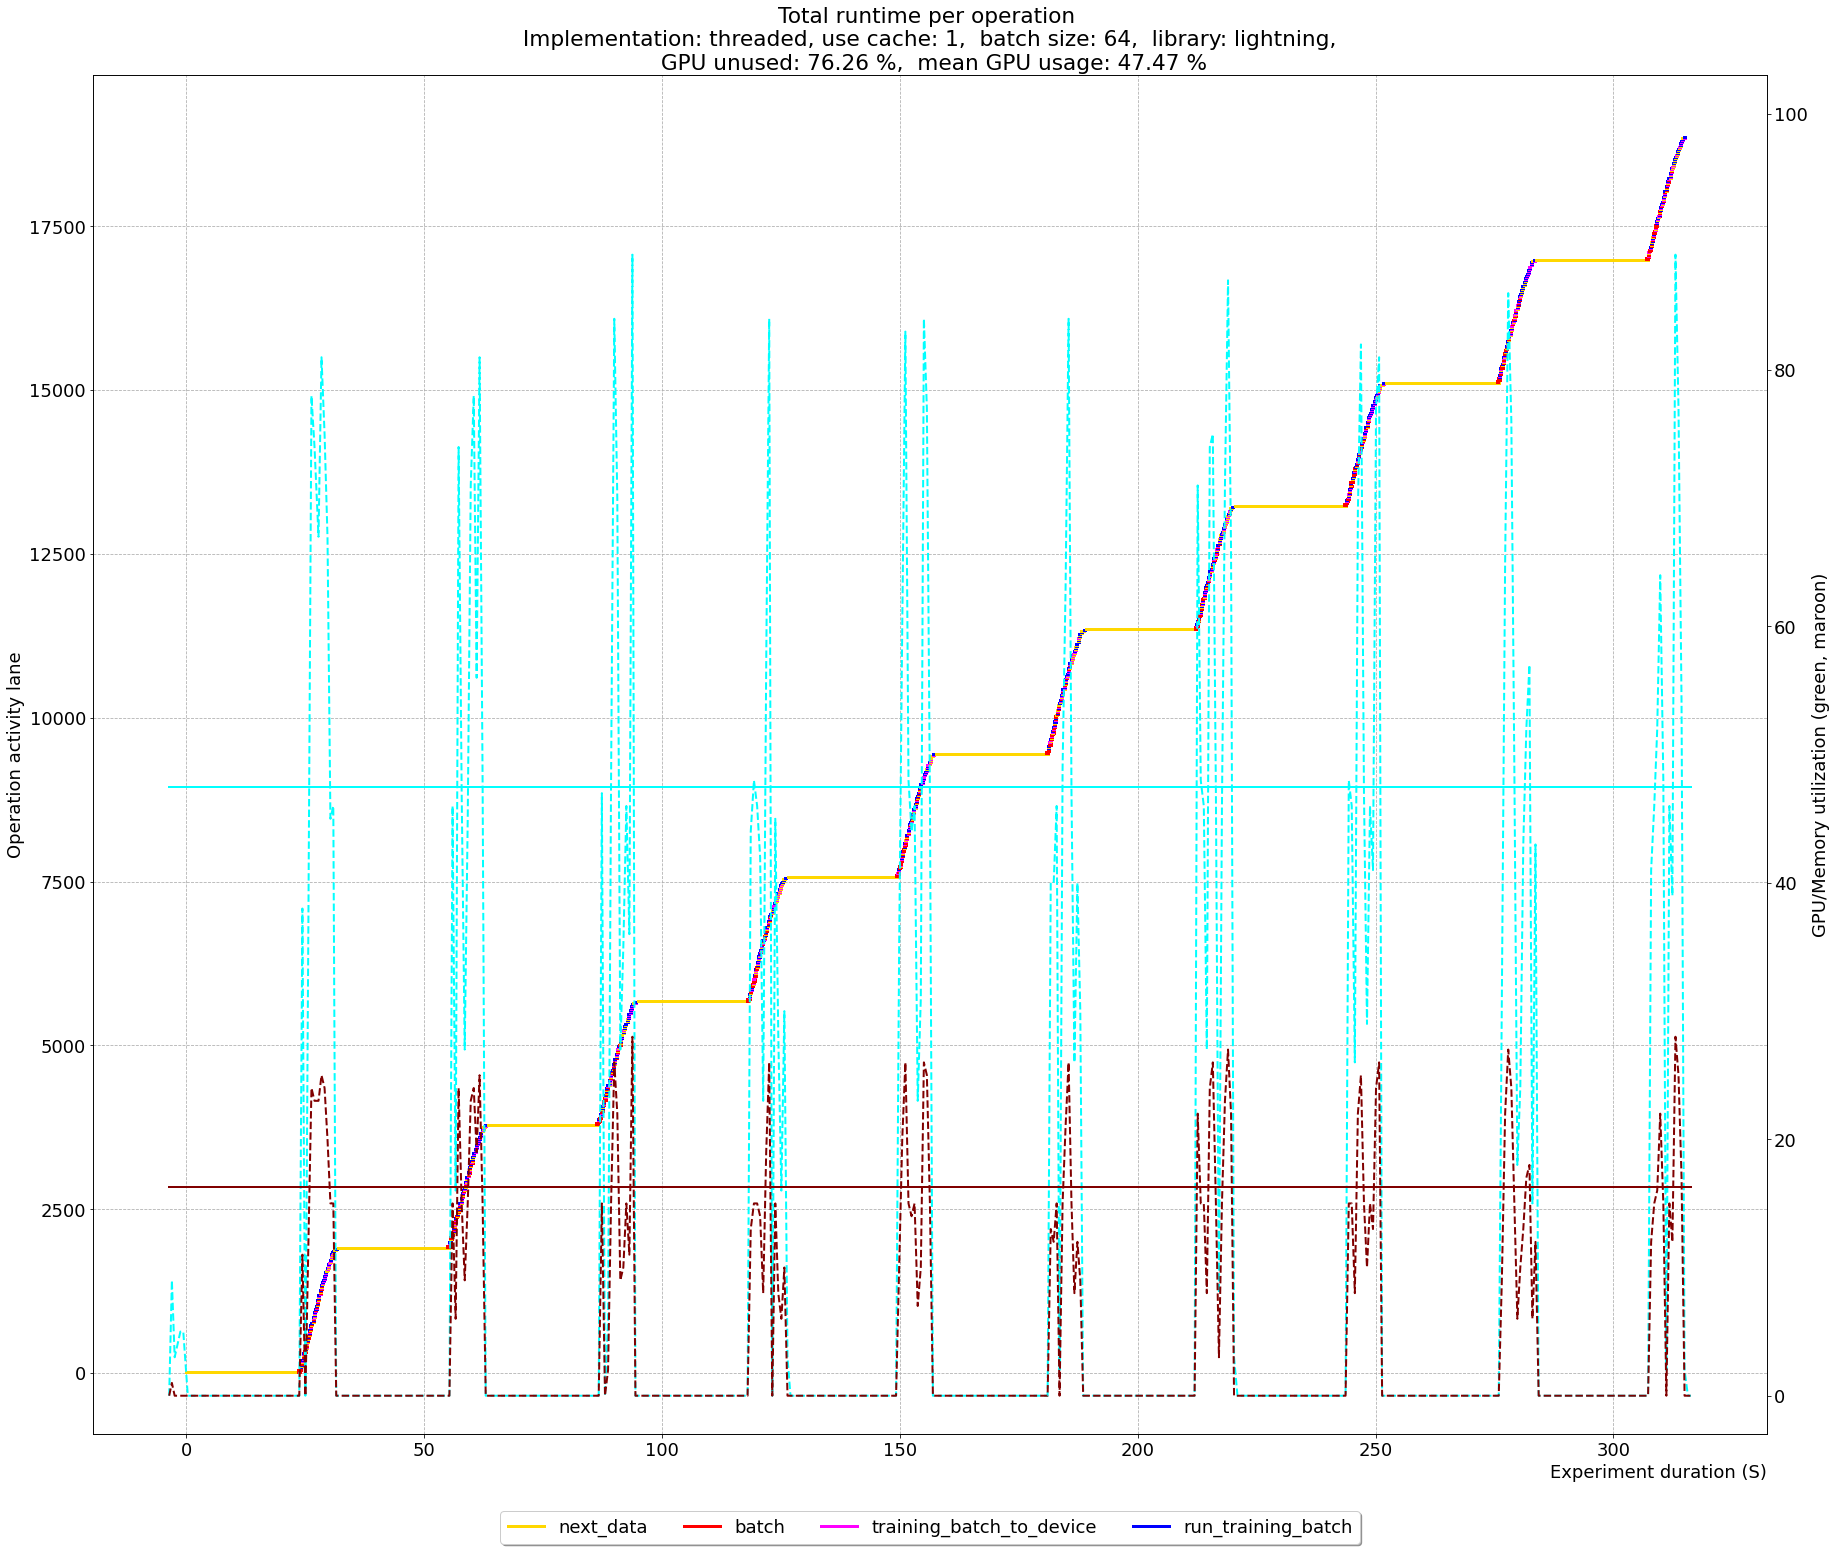

63.40909090909091 37.285714285714285


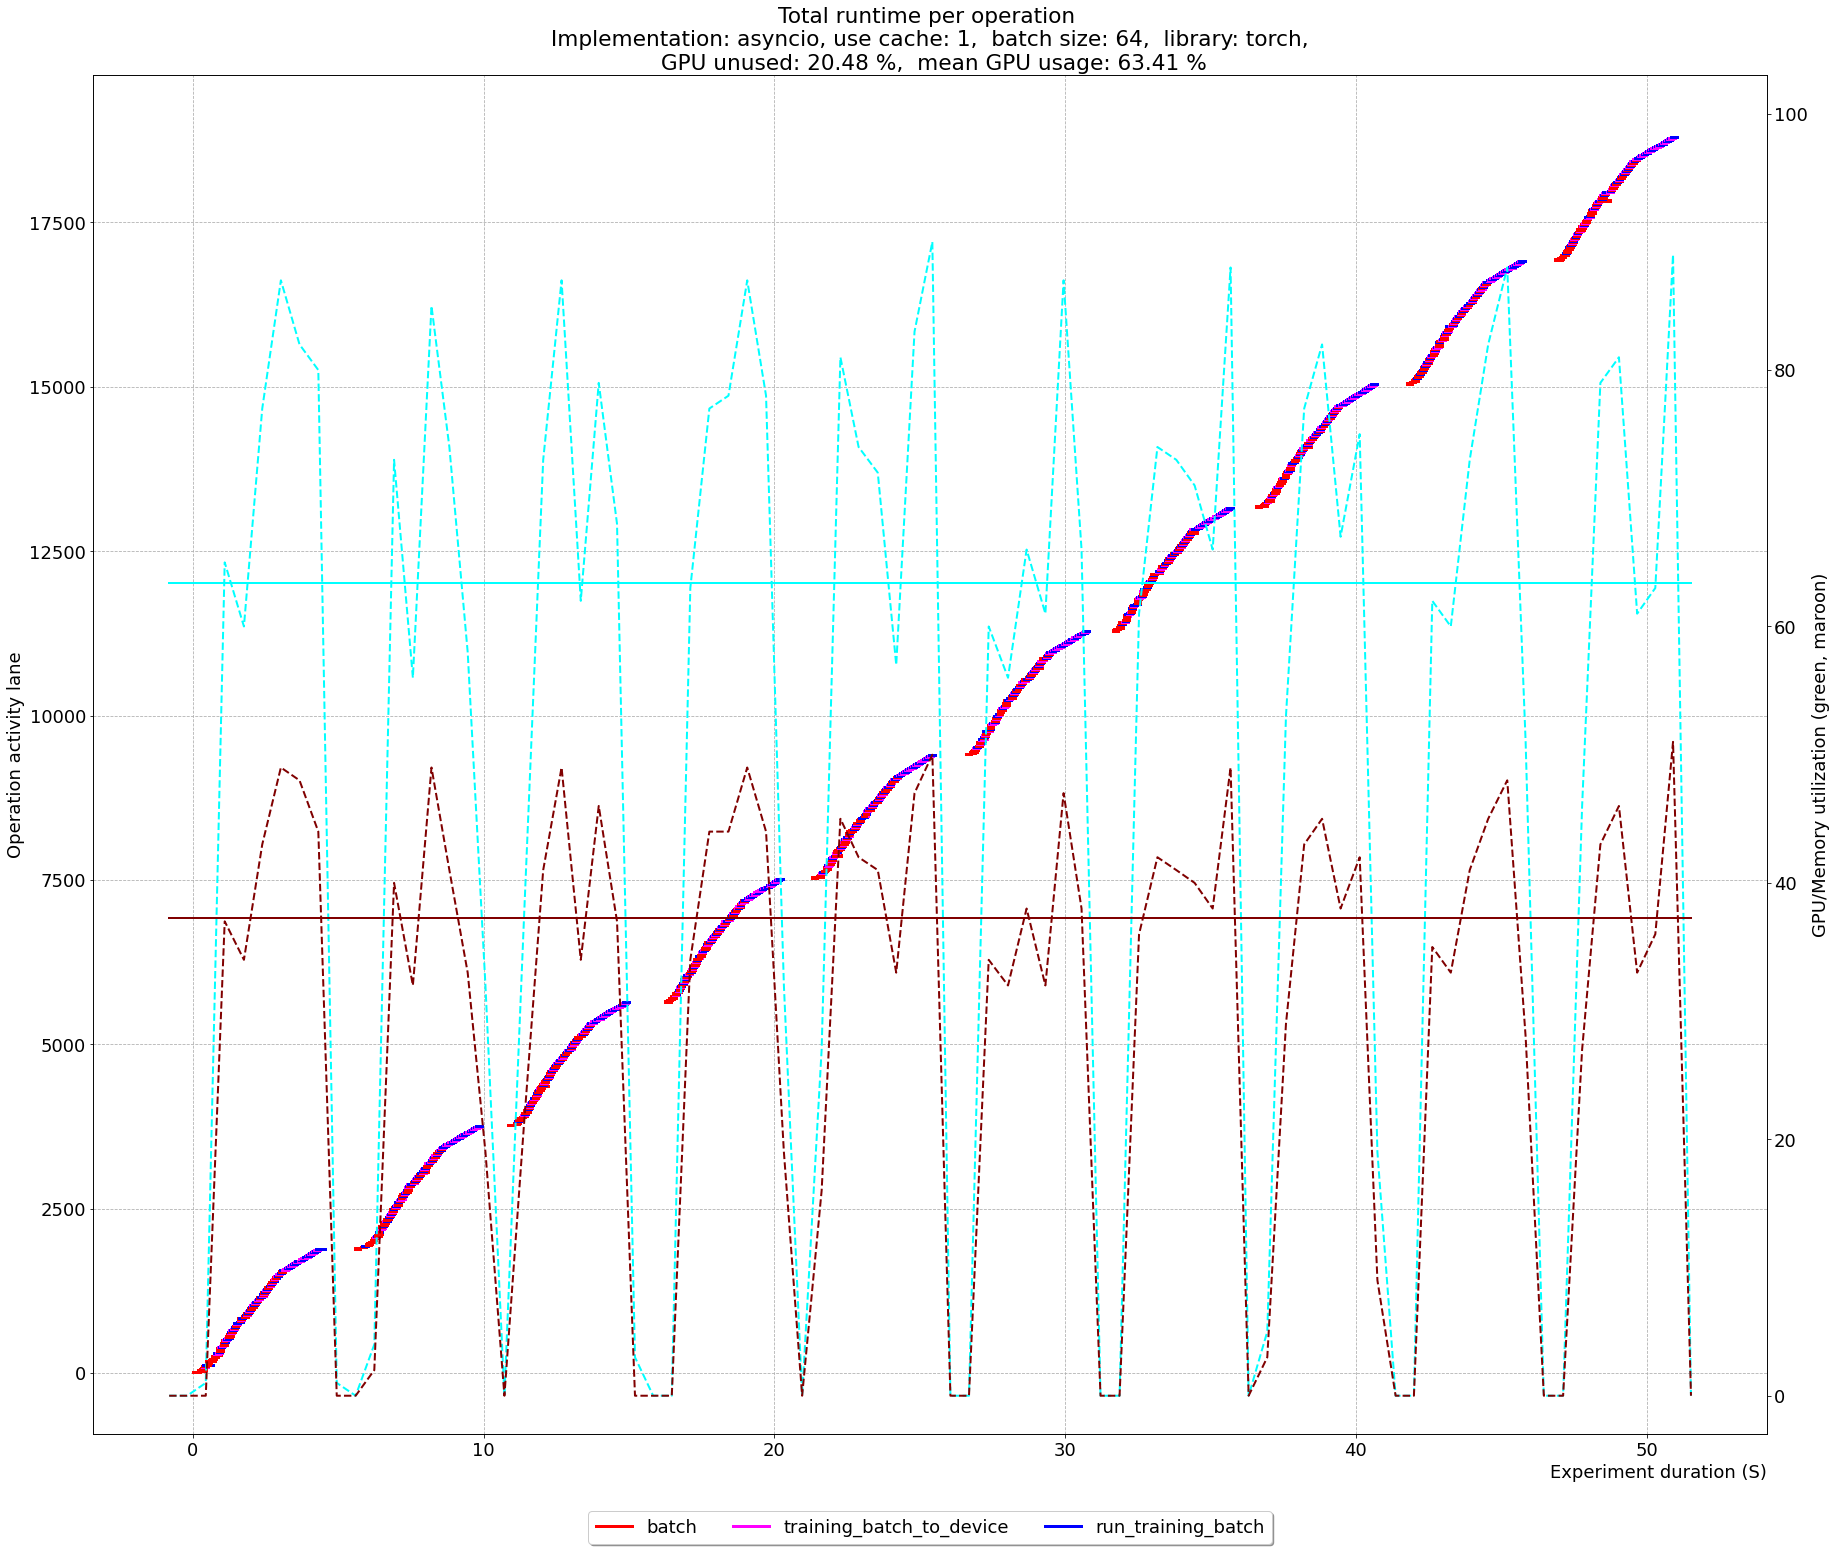

44.88095238095238 15.23076923076923


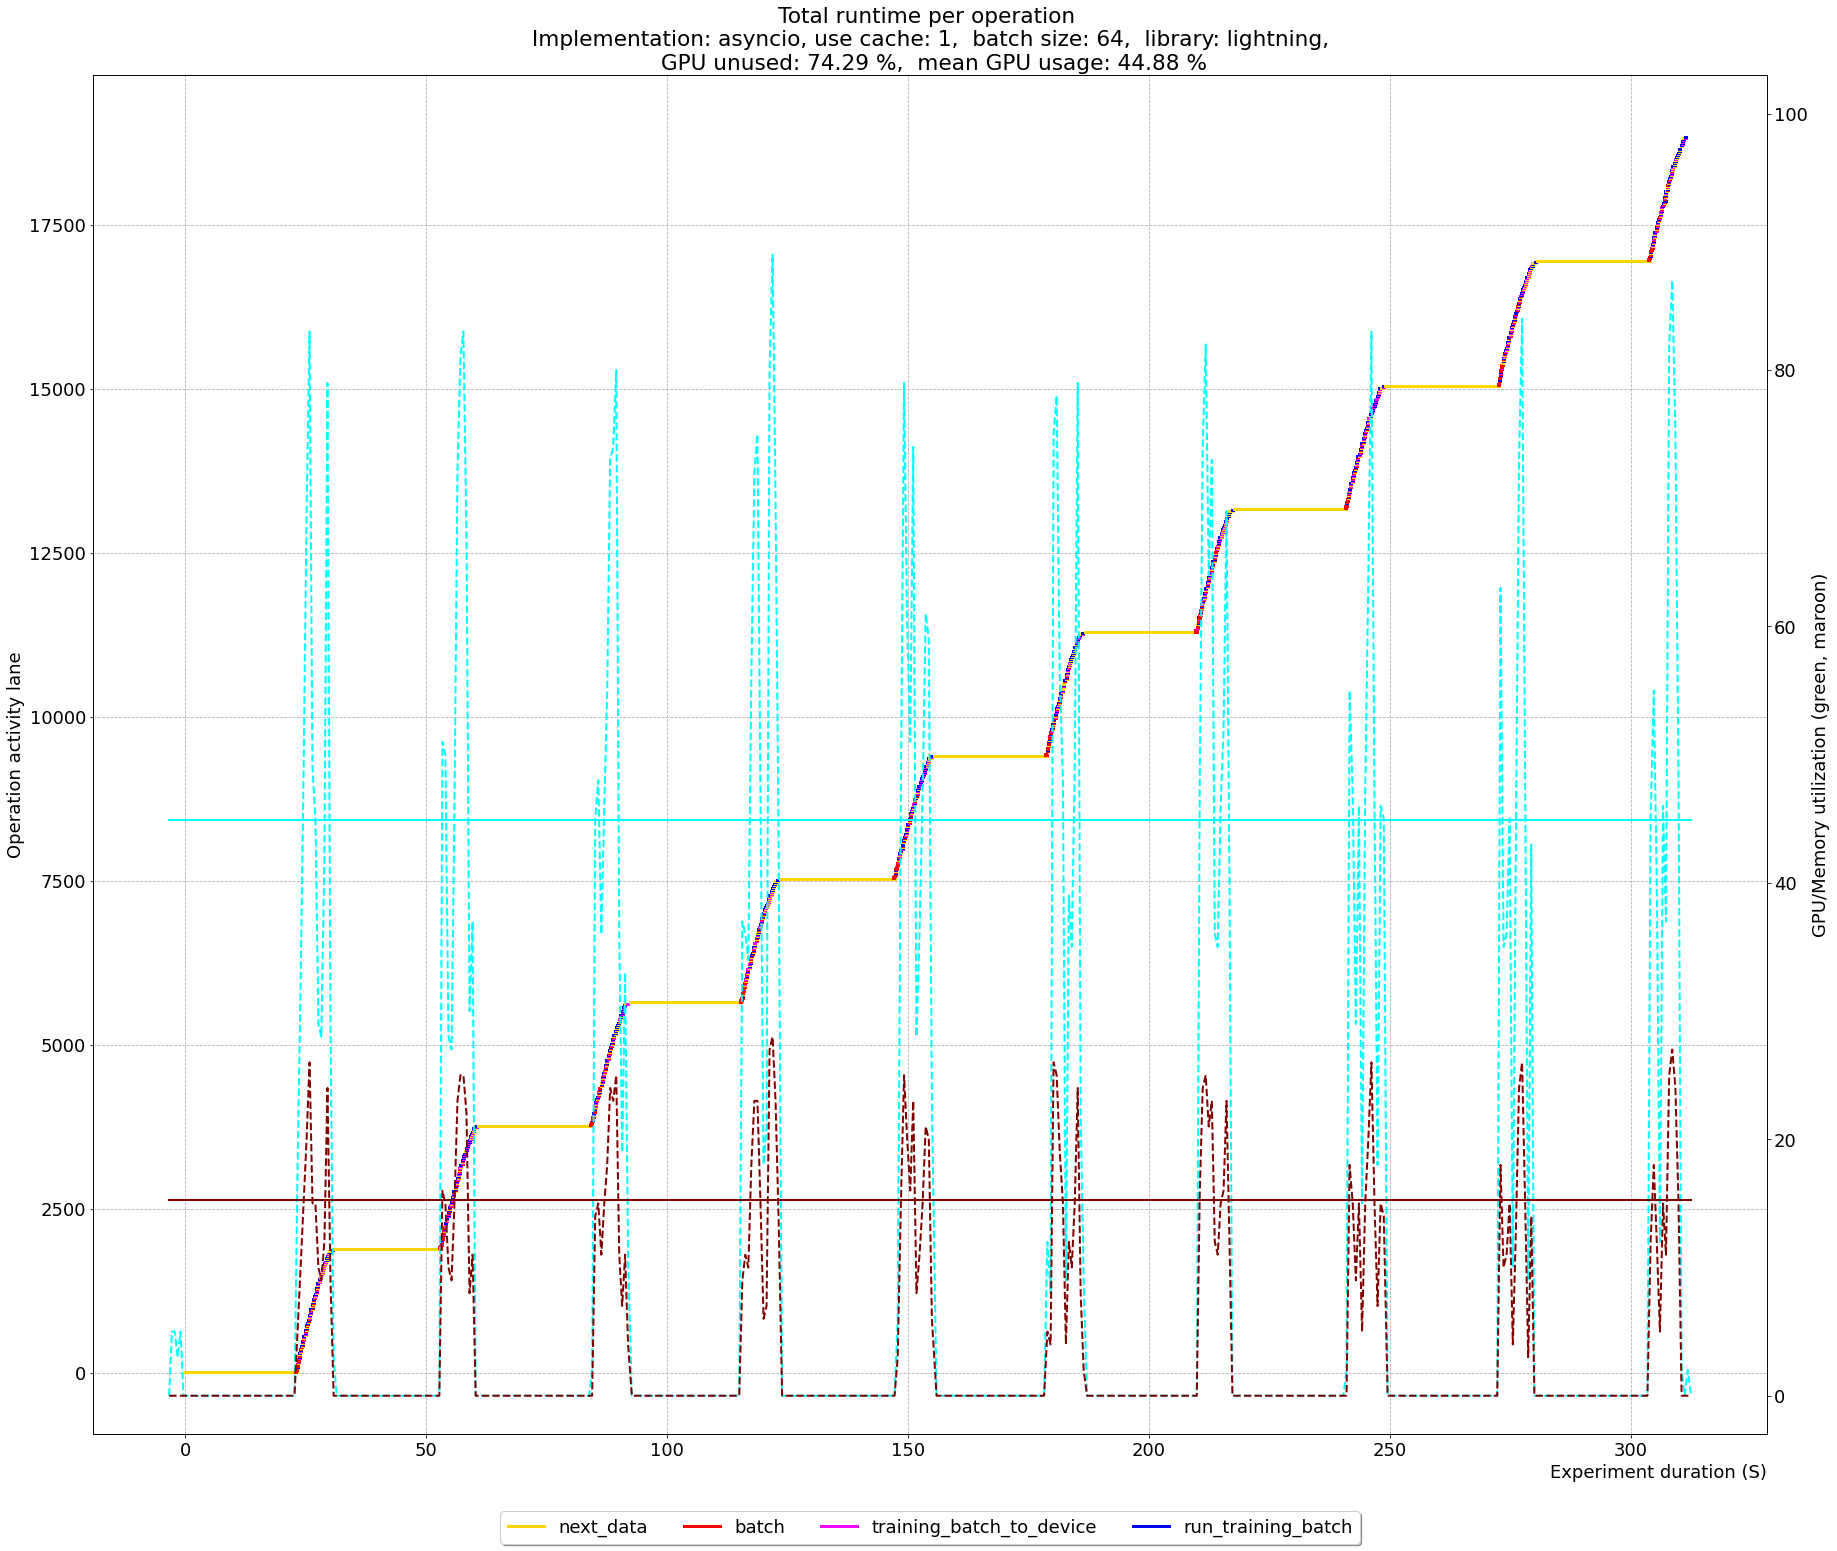

50.813559322033896 30.61111111111111


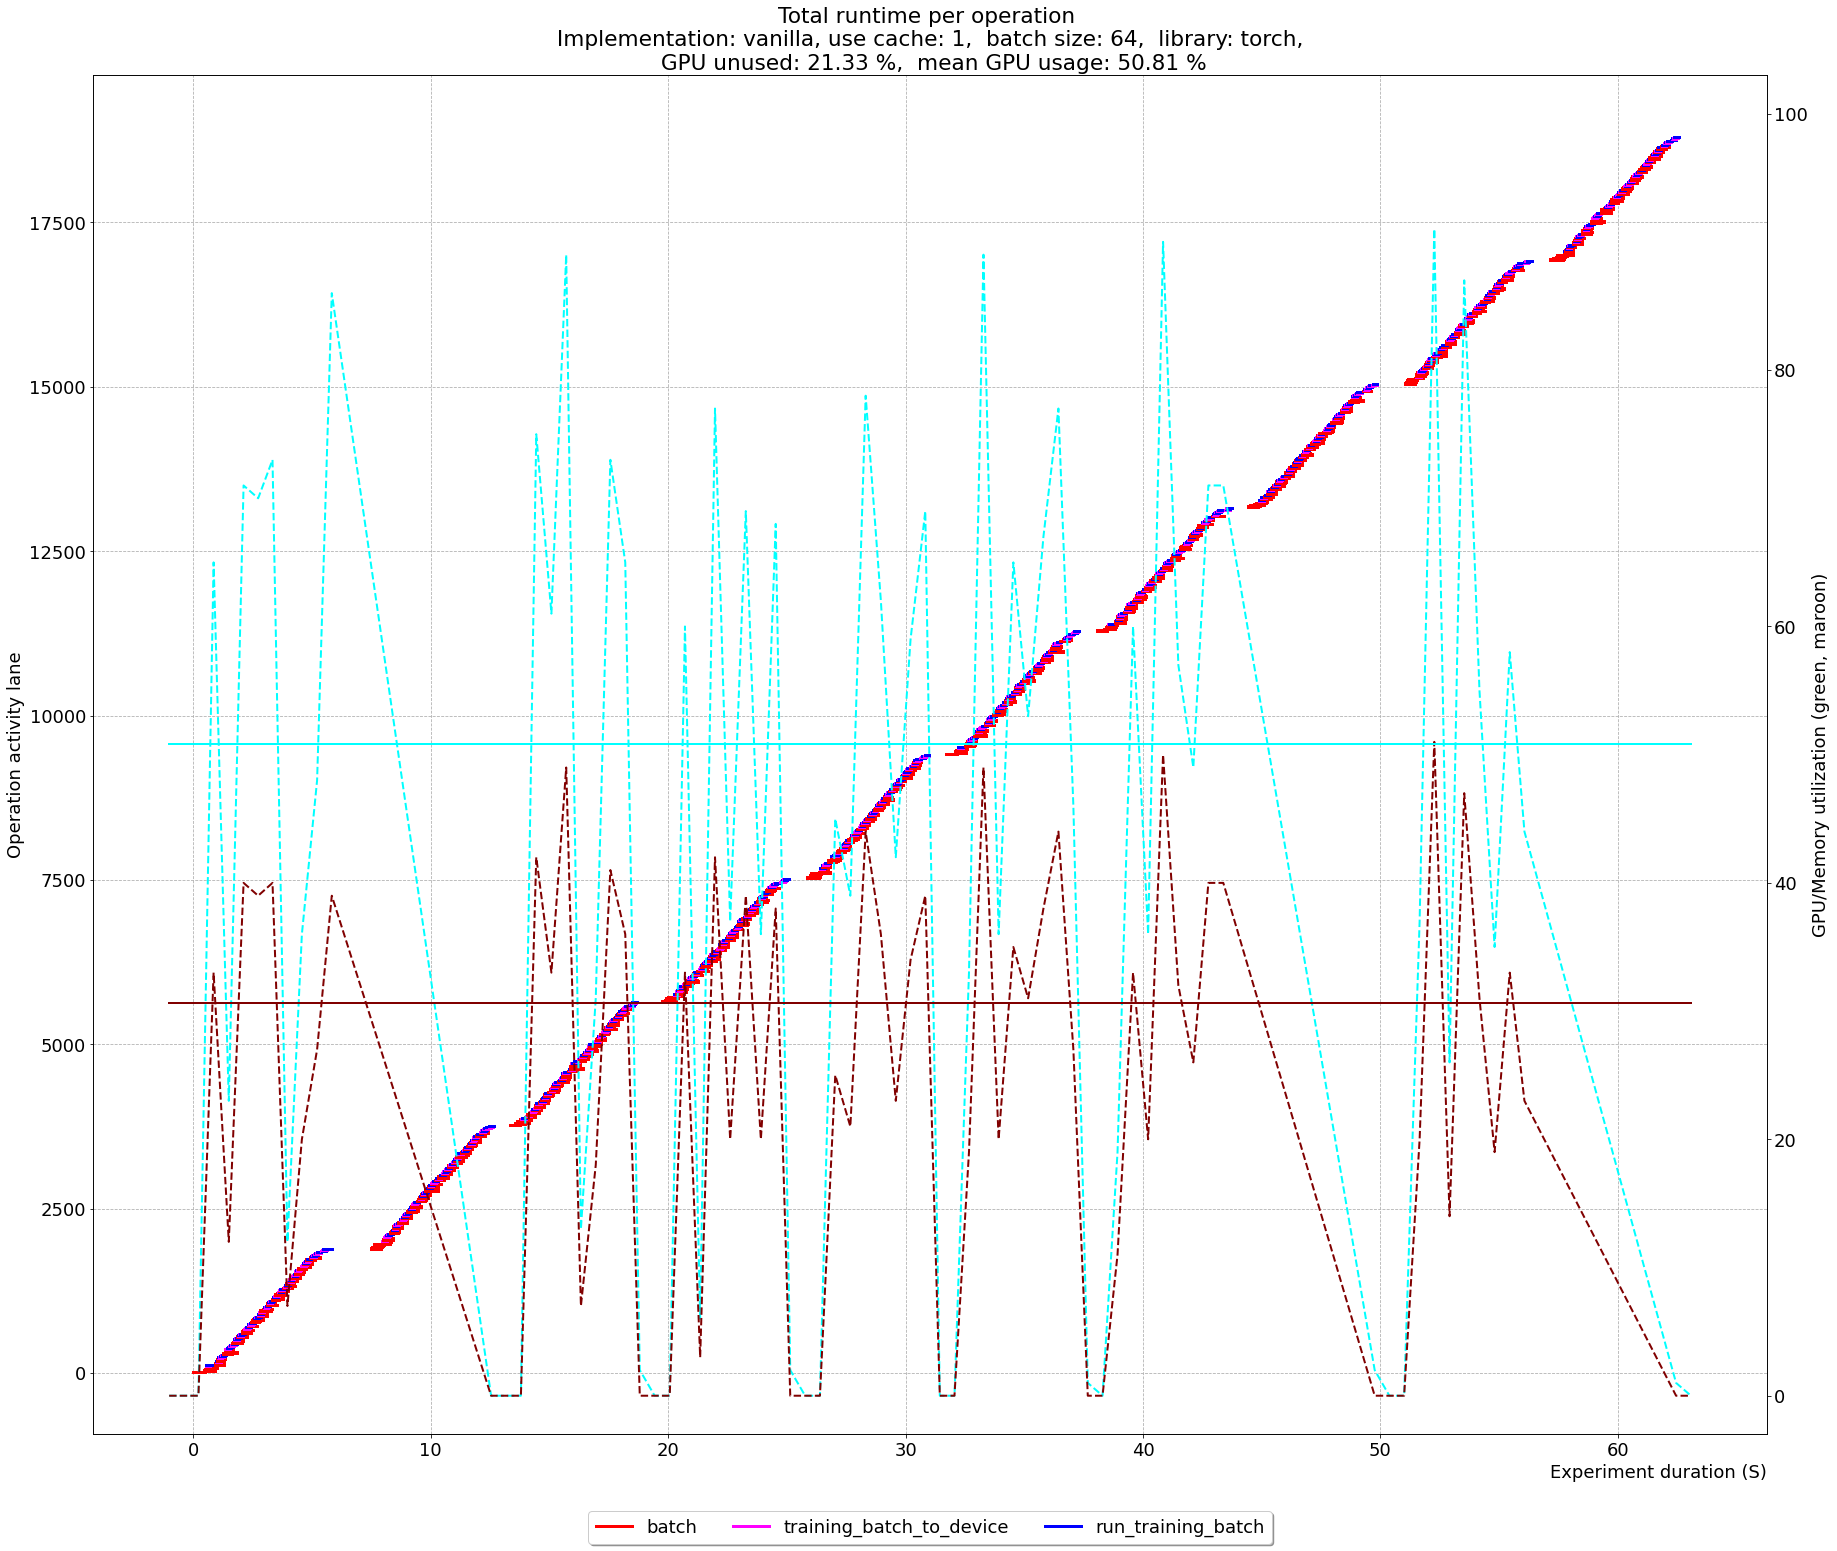

28.682051282051283 10.357142857142858


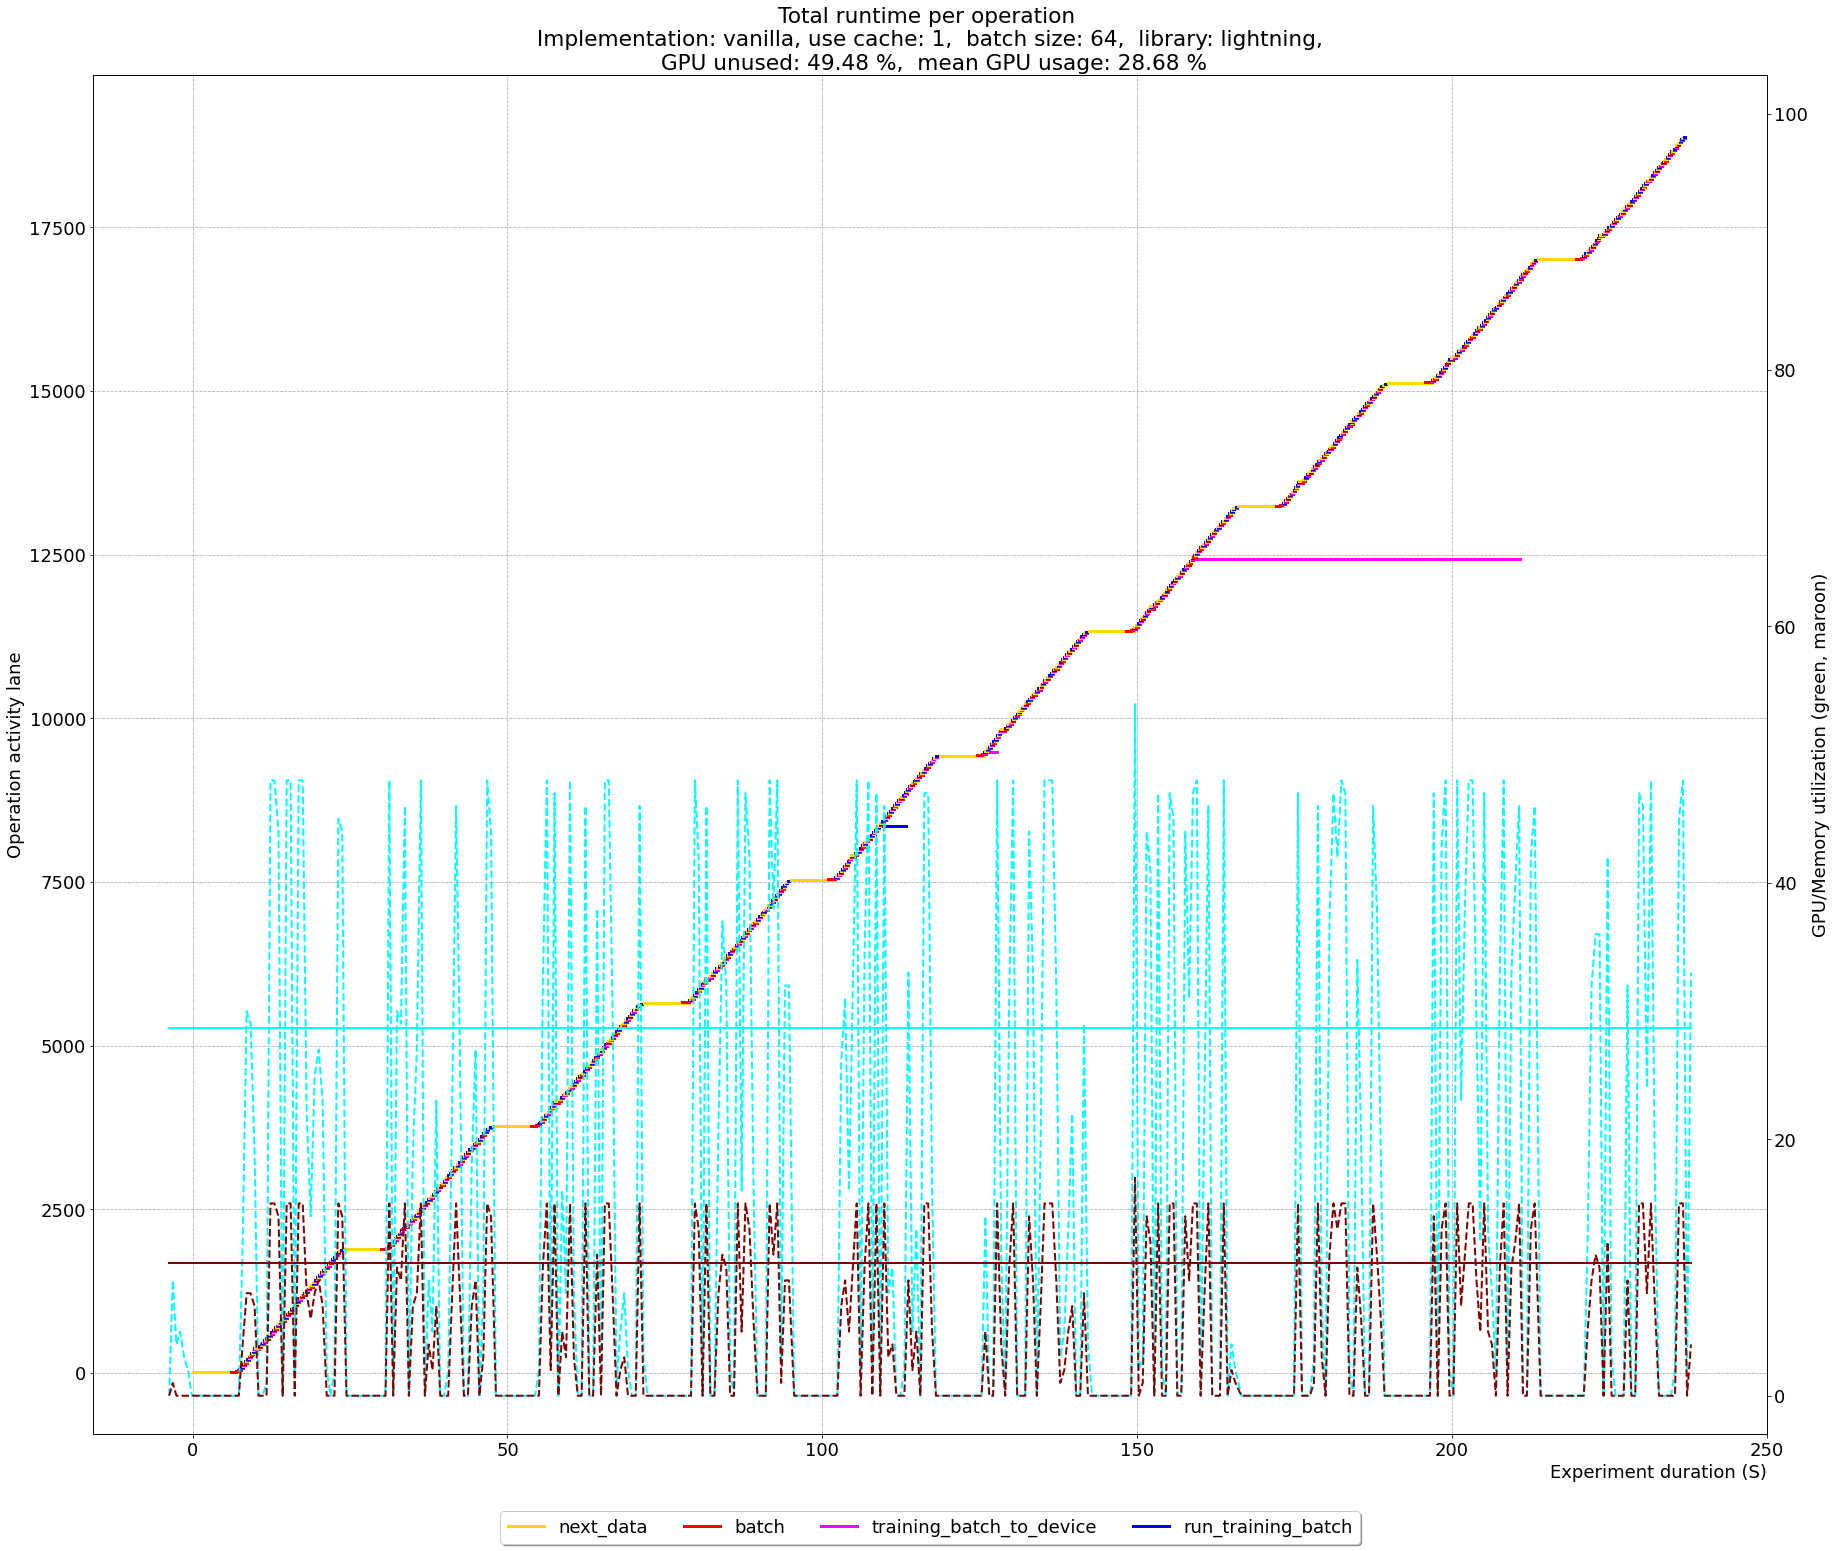

In [11]:
returns_scratch = []
for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    returns_scratch.append(show_timelines_with_gpu(df, dfgpu, colors, run, False, True, False, 1))

#### Result tables

The following two tables display throughput details for both experiments. The default sample size, i.e. number of dataset items is 300.

In [12]:
samples = 3000

#### AWS S3

In [13]:
results = pd.DataFrame.from_records(data=returns_s3)
results["throughput"] = samples / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)

runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
2   227.241910      75.783476               36.270588       5.176638   
4   272.509452      82.388060               44.169492       4.367164   
0   297.539659      79.157895               45.141414       5.309474   
3   431.668852      78.273810               39.678082       2.741071   
1   436.889108      80.412371               42.037594       2.606775   
5  3648.227165      96.358251               29.679426       0.332985   

   mem_util_mean_no_zeros implementation cache    library  throughput  
2               24.554054        asyncio     1      torch   13.201790  
4               25.666667        vanilla     1      torch   11.008792  
0               28.337079       threaded     1      torch   10.082690  
3               13.544118        asyncio     1  lightning    6.949772  
1               14.750000       threaded     1  lightning    6.866731  
5               10.329730        vanilla     1  lightning    0.822317

#### Scratch

In [14]:
results = pd.DataFrame.from_records(data=returns_scratch)
results["throughput"] = samples / results["runtime"]
results.sort_values(["runtime", "library"], ascending=True)

runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
2   50.868543      20.481928               63.409091      28.301205   
4   62.389921      21.333333               50.813559      22.040000   
0   93.802143      55.333333               61.522388      14.593333   
5  237.013317      49.481865               28.682051       4.507772   
3  311.498159      74.285714               44.880952       3.636735   
1  315.063369      76.257545               47.474576       3.567404   

   mem_util_mean_no_zeros implementation cache    library  throughput  
2               37.285714        asyncio     1      torch   58.975544  
4               30.611111        vanilla     1      torch   48.084690  
0               34.203125       threaded     1      torch   31.982212  
5               10.357143        vanilla     1  lightning   12.657517  
3               15.230769        asyncio     1  lightning    9.630876  
1               16.266055       threaded     1  lightning    9.521894